# Hypothesen Tests
In diesem Notebook versuchen wir uns die meisten der Hypothesen anzuschauen, die vor der Datenerhebung erstellt worden sind. Die Wahl der Methoden die hier angewendet werden und die Gründe dafür werden in der folgenden Quelle ausführlicher beschrieben:

- https://bookdown.org/Rmadillo/likert/

Zusammenfassen lässt sich der Umgang mit dem Datensatz wie folgt:
 - Mittelwert Vergleiche mit Likert Skala Daten funktionieren meist nicht gut, da die Abstände zwischen den Wahloptionen nicht klar definiert sind (Wie groß ist der Unterschied zwischen Option 2 und 1 ?). In diesem Datensatz kommt dazu noch das Problem, das aus UX Gründen eine neutrale Wahloption ausgeschlossen wurde. Deshalb lassen sich Methoden die Mittelwerte vergleichen hier nicht korrekt anwenden.
 - Viele Hypothesentests werden bei kleineren Unterschieden zwischen den Gruppen signifikanter, je größer der Datensatz ist. Bei der Größe unseres Datensatzes sollte man sich deshalb nicht auf klassische Hypothesentests verlassen. Eine Kombination aus Visualisierung, Konfidenzintervalle und Proportional Odds Regression sollen deshalb helfen, Unterschiede fest zu stellen.
 - Da die Merkmale im Datensatz nicht für alle Gruppen und Hypothesen gleich verteilt sind, werden zudem die Größe der Gruppen visualisiert.

In [1]:
import pandas as pd
from src.visualization.visualize import likert_plot, likert_plot_tab, group_comparison
from src.data import load_full_data
from src.exploration.explore import test_hypothesis, build_likelihood_ratio_test
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

### Notes:
- MS = HVS
- CP = Seitenraum
- SE = NVS

In [2]:
full_data_df = load_full_data()
bike_data = {}
bike_data["ms"] = full_data_df[full_data_df["Experiment"] == "MS"].dropna(axis=1, how="all")
bike_data["ms"] = bike_data["ms"][bike_data["ms"]["Kamera"] == "C"]
bike_data["cp"] = full_data_df[full_data_df["Experiment"] == "CP"].dropna(axis=1, how="all")
bike_data["cp"] = bike_data["cp"][bike_data["cp"]["Kamera"] == "C"]
bike_data["se"] = full_data_df[full_data_df["Experiment"] == "SE"].dropna(axis=1, how="all")
bike_data["se"] = bike_data["se"][bike_data["se"]["Kamera"] == "C"]

# 0. Profilfragen
## a) Geschlecht

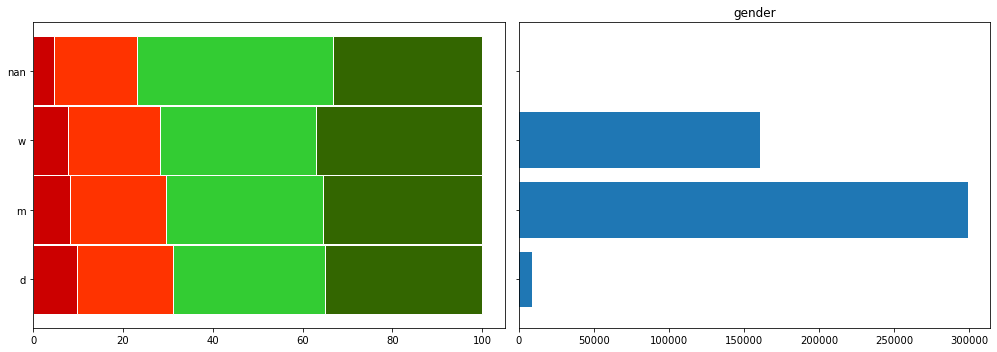

       unsafe  almost_unsafe  almost_safe       safe
d    9.831594      21.240512    33.906546  35.021347
m    8.185250      21.410971    34.955650  35.448129
w    7.824049      20.332307    34.931507  36.912137
NaN  4.675325      18.441558    43.636364  33.246753


In [3]:
df = full_data_df
likert_plot (df[["gender","rating"]])

## b) Alter

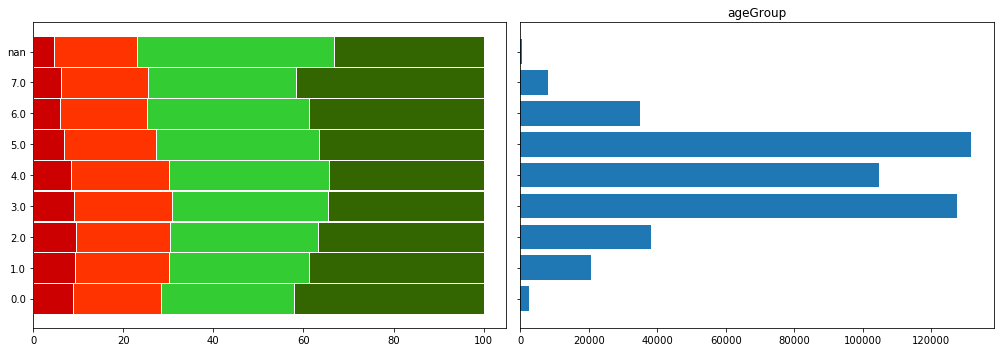

       unsafe  almost_unsafe  almost_safe       safe
0.0  8.922697      19.490132    29.481908  42.105263
1.0  9.367420      20.752886    31.124479  38.755215
2.0  9.452893      20.825782    32.878943  36.842382
3.0  9.149358      21.724335    34.507092  34.619215
4.0  8.353393      21.826761    35.510278  34.309567
5.0  6.902527      20.468174    36.023561  36.605738
6.0  6.061991      19.217255    35.969147  38.751607
7.0  6.204244      19.344832    32.696364  41.754560
NaN  4.675325      18.441558    43.636364  33.246753


In [4]:
df = full_data_df
likert_plot (df[["ageGroup","rating"]])


## c) Nutzungshäufigkeit Fahrrad

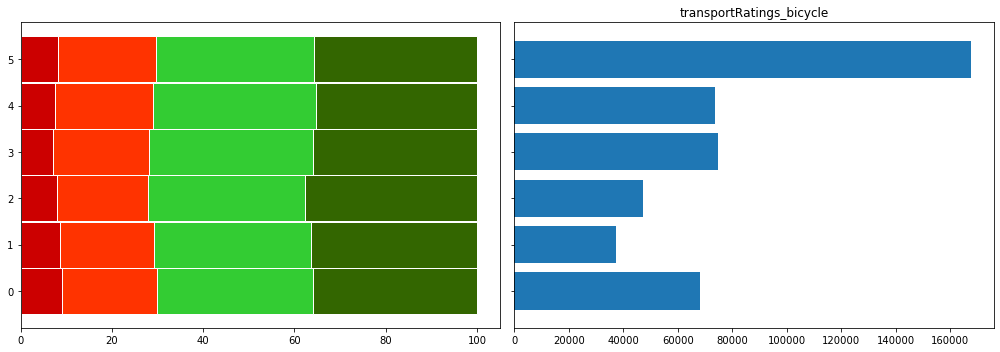

     unsafe  almost_unsafe  almost_safe       safe
0  9.122029      20.652014    34.344607  35.881350
1  8.619391      20.588077    34.345744  36.446788
2  7.983095      19.878098    34.502092  37.636715
3  7.195407      21.030776    35.828827  35.944990
4  7.542612      21.504180    35.653024  35.300185
5  8.219178      21.413216    34.713547  35.654059


In [5]:
df = full_data_df
likert_plot (df[["transportRatings_bicycle","rating"]])

## d) Dauer Fahrradnutzung

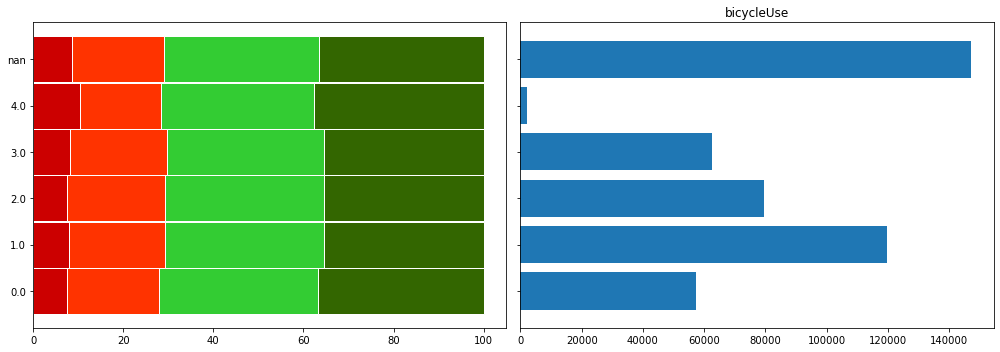

        unsafe  almost_unsafe  almost_safe       safe
0.0   7.512106      20.525865    35.296586  36.665443
1.0   7.911432      21.367136    35.272533  35.448900
2.0   7.564696      21.650639    35.262058  35.522606
3.0   8.155553      21.615804    34.714117  35.514525
4.0  10.331931      17.999065    33.987845  37.681159
NaN   8.677077      20.430356    34.453599  36.438968


In [6]:
df = full_data_df
likert_plot (df[["bicycleUse","rating"]])

## d) Bezirke

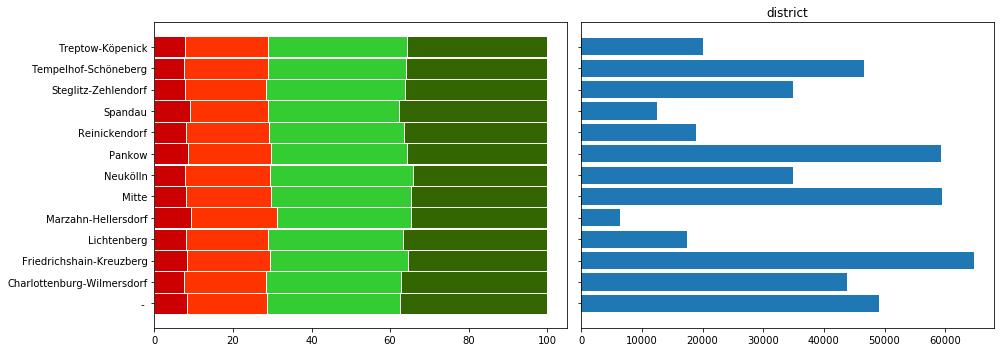

                              unsafe  almost_unsafe  almost_safe       safe
 -                          8.350459      20.214866    33.857611  37.577065
Charlottenburg-Wilmersdorf  7.538181      20.738546    34.574880  37.148393
Friedrichshain-Kreuzberg    8.375807      21.037593    35.141939  35.444661
Lichtenberg                 7.994471      20.971086    34.345122  36.689322
Marzahn-Hellersdorf         9.224057      22.062948    33.920224  34.792770
Mitte                       8.026402      21.549856    35.659462  34.764280
Neukölln                    7.778765      21.650371    36.376409  34.194455
Pankow                      8.545148      21.174684    34.538397  35.741772
Reinickendorf               8.145562      20.961599    34.449381  36.443457
Spandau                     9.075002      19.867971    33.293566  37.763461
Steglitz-Zehlendorf         7.781656      20.667163    35.292098  36.259083
Tempelhof-Schöneberg        7.577840      21.400043    35.125617  35.896500
Treptow-Köpe

In [7]:
df = full_data_df
likert_plot (df[["district","rating"]])

# 1. Auswertung MS
Anmerkung zu Plots (von Tümer): test_hypothesis nutzt halt den Median. Der Plot ist etwas unpräzise, weil er nur die absoluten Werte (0,1,2,3) nimmt. Median von pandas nimmt aber, wenn man genau in der Mitte zwischen zwei Werten steht dann den Mittelwert aus den beiden. Deshalb gibt es in der Gruppe auch Werte wie 2.5. Das ist wichtig für das korrekte testen der Hypothesen. Wenn du jetzt die Balken vom Plot nimmst, fehlen halt die Zwischenwerte.
Deswegen gelten eher die Werte sicher Gruppe1/2 (sicher = safe+almost safe)

### a) Einflussfaktor "Radverkehrsanlage vorhanden" (BS: 1 vs. 2-6)
Gruppe1: Hauptverkehrsstraßen ohne RVA <br>
Gruppe2: Hauptverkehrsstraßen mit RVA und Busstreifen

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

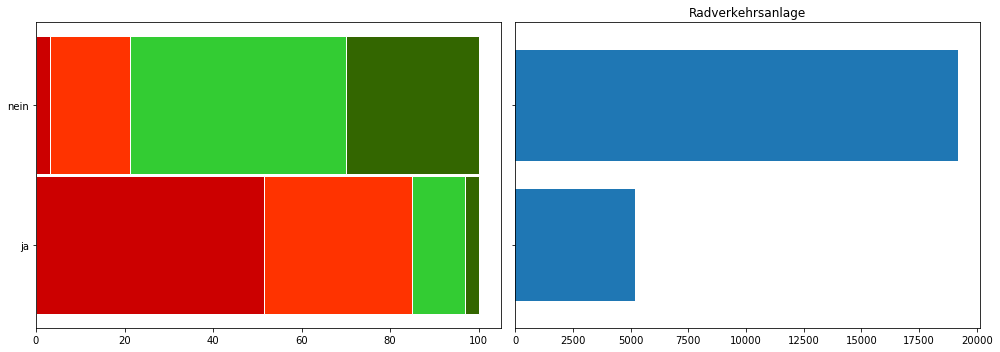

           unsafe  almost_unsafe  almost_safe       safe
group1  51.541129      33.452129    12.011173   2.995569
group2   3.063725      18.142470    48.714539  30.079266
Mittelwert von  ja - 0.6646118281641302
Mittelwert von  nein - 2.058093450146016
Bootstrap Ergebnis: -75.0    (-75.0, -50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -67.70740278499123
Ist der Unterschied signifikant? True
sicher Gruppe 1  14.23617800038528 sicher Gruppe2 75.5162703379224
Ergebnisse für Gruppe  w


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

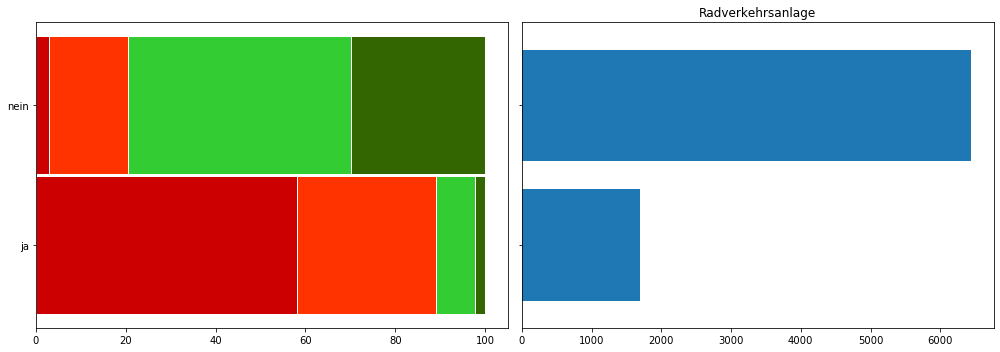

           unsafe  almost_unsafe  almost_safe       safe
group1  58.037825      30.910165     8.894799   2.157210
group2   2.894614      17.662580    49.666305  29.776502
Mittelwert von  ja - 0.5517139479905437
Mittelwert von  nein - 2.063246934657768
Bootstrap Ergebnis: -100.0    (-100.0, -100.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -73.25991674951614
Ist der Unterschied signifikant? True
sicher Gruppe 1  10.520094562647754 sicher Gruppe2 76.09809095142013
Ergebnisse für Gruppe  m


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

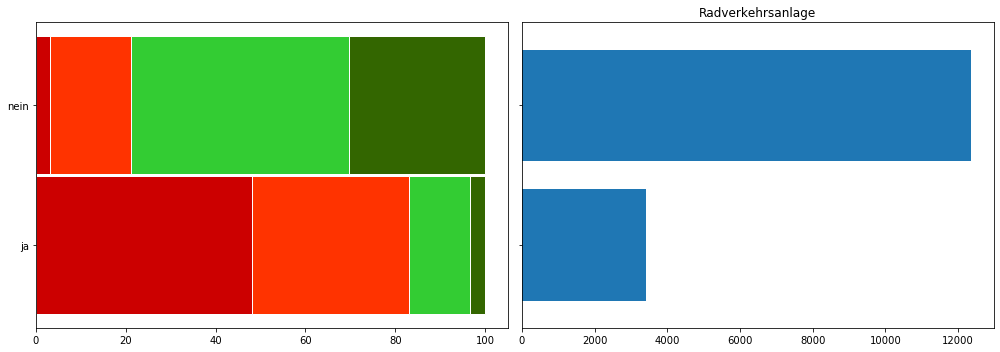

           unsafe  almost_unsafe  almost_safe       safe
group1  48.153576      34.818288    13.628370   3.399766
group2   3.022334      18.239197    48.413983  30.324486
Mittelwert von  ja - 0.7227432590855803
Mittelwert von  nein - 2.0604062145978315
Bootstrap Ergebnis: -50.0    (-50.0, -25.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -64.92229280008011
Ist der Unterschied signifikant? True
sicher Gruppe 1  16.148886283704574 sicher Gruppe2 75.48956141770513
Ergebnisse für Gruppe  u30


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

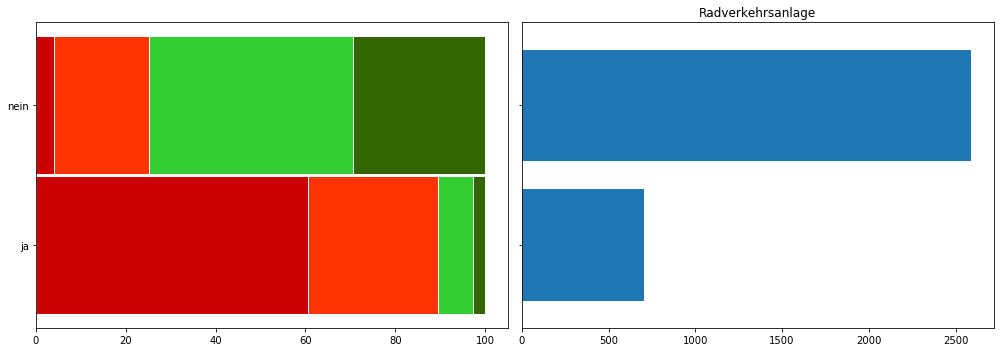

           unsafe  almost_unsafe  almost_safe       safe
group1  60.485021      29.101284     7.774608   2.639087
group2   3.976834      21.158301    45.405405  29.459459
Mittelwert von  ja - 0.5256776034236804
Mittelwert von  nein - 2.0034749034749035
Bootstrap Ergebnis: -100.0    (-100.0, -100.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -73.76170759554188
Ist der Unterschied signifikant? True
sicher Gruppe 1  9.700427960057063 sicher Gruppe2 71.19691119691119
Ergebnisse für Gruppe  30-64


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

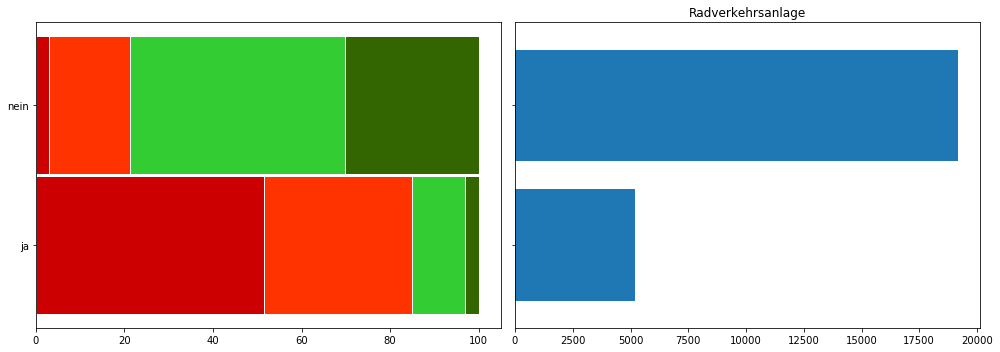

           unsafe  almost_unsafe  almost_safe       safe
group1  51.532382      33.452197    12.018119   2.997301
group2   3.060905      18.143625    48.721361  30.074109
Mittelwert von  ja - 0.6648033924441018
Mittelwert von  nein - 2.05808673868796
Bootstrap Ergebnis: -75.0    (-75.0, -50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -67.69798959649694
Ist der Unterschied signifikant? True
sicher Gruppe 1  14.244410177332306 sicher Gruppe2 75.51797922864151
Ergebnisse für Gruppe  Ü64


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

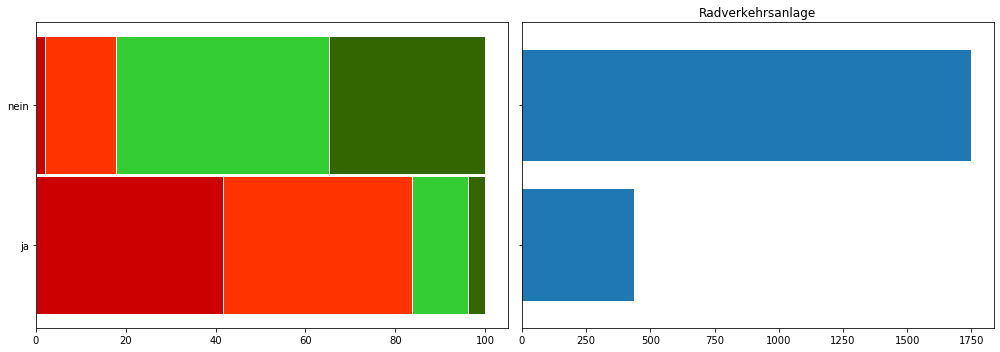

           unsafe  almost_unsafe  almost_safe       safe
group1  41.533181      42.219680    12.471396   3.775744
group2   2.029731      15.694683    47.427101  34.848485
Mittelwert von  ja - 0.7848970251716247
Mittelwert von  nein - 2.150943396226415
Bootstrap Ergebnis: -50.0    (-50.0, -50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -63.50917339114377
Ist der Unterschied signifikant? True
sicher Gruppe 1  15.102974828375284 sicher Gruppe2 79.30245854774157
Ergebnisse für Gruppe  selten Rad


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

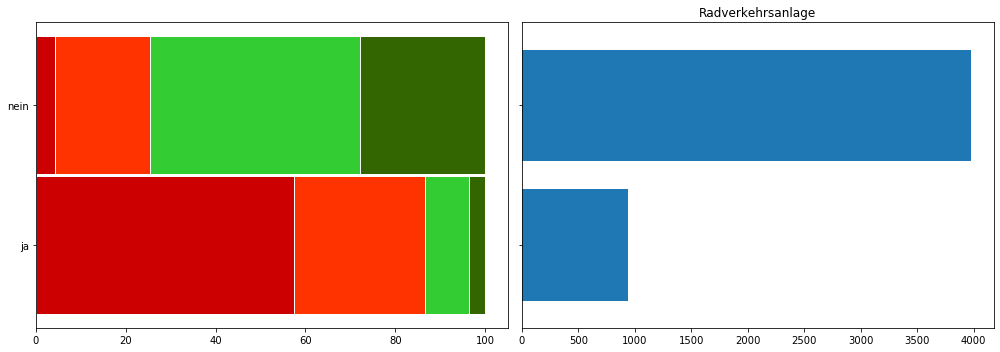

           unsafe  almost_unsafe  almost_safe       safe
group1  57.500000      29.202128     9.734043   3.563830
group2   4.248366      21.166415    46.794872  27.790347
Mittelwert von  ja - 0.5936170212765958
Mittelwert von  nein - 1.9812719959778784
Bootstrap Ergebnis: -100.0    (-100.0, -100.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -70.03859023487537
Ist der Unterschied signifikant? True
sicher Gruppe 1  12.872340425531913 sicher Gruppe2 70.6385118149824
Ergebnisse für Gruppe  regelmäßig Rad


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

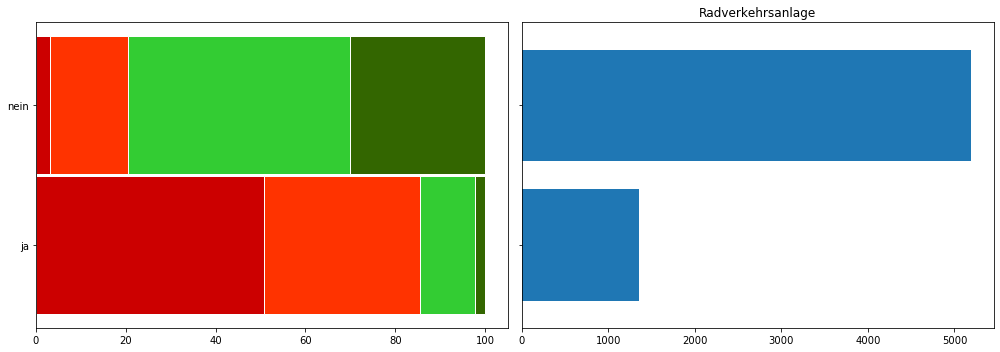

           unsafe  almost_unsafe  almost_safe       safe
group1  50.816024      34.606825    12.240356   2.336795
group2   3.138841      17.436934    49.335644  30.088581
Mittelwert von  ja - 0.6609792284866469
Mittelwert von  nein - 2.063739649528211
Bootstrap Ergebnis: -75.0    (-100.0, -50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -67.97177257132446
Ist der Unterschied signifikant? True
sicher Gruppe 1  13.724035608308604 sicher Gruppe2 76.23724244174849
Ergebnisse für Gruppe  oft Rad


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

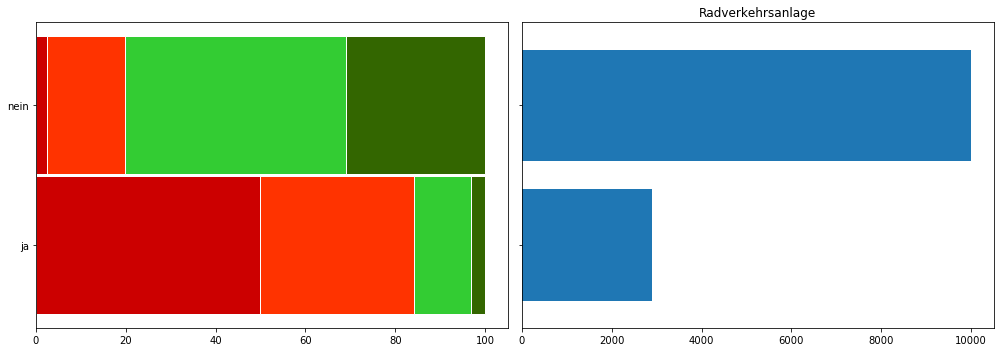

           unsafe  almost_unsafe  almost_safe       safe
group1  49.948329      34.292112    12.642094   3.117465
group2   2.553723      17.306347    49.155422  30.984508
Mittelwert von  ja - 0.689286944540131
Mittelwert von  nein - 2.0857071464267865
Bootstrap Ergebnis: -75.0    (-75.0, -75.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -66.95188268779675
Ist der Unterschied signifikant? True
sicher Gruppe 1  14.915604547020322 sicher Gruppe2 77.08145927036482


In [8]:
df = bike_data["ms"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'w')
group1 = df_w[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_w[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ',  'm')
group1 = df_m[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_m[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'u30')
group1 = df_u30[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_u30[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print('Ergebnisse für Gruppe ', '30-64')
group1 = df_30_64[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_30_64[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'Ü64')
group1 = df_ue64[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_ue64[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'selten Rad')
group1 = df_Bs[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_Bs[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'regelmäßig Rad')
group1 = df_Br[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_Br[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'oft Rad')
group1 = df_Bo[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_Bo[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)


### b) Einflussfaktor "Gesamtbreite Radverkehrsanlage" (BS 2 bis 5)
Gruppe1: Hauptverkehrsstraßen mit RVA; Gesamtbreite RVA = "schmal"<br>
Gruppe2: Hauptverkehrsstraßen mit RVA; Gesamtbrete RVA = "breit"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

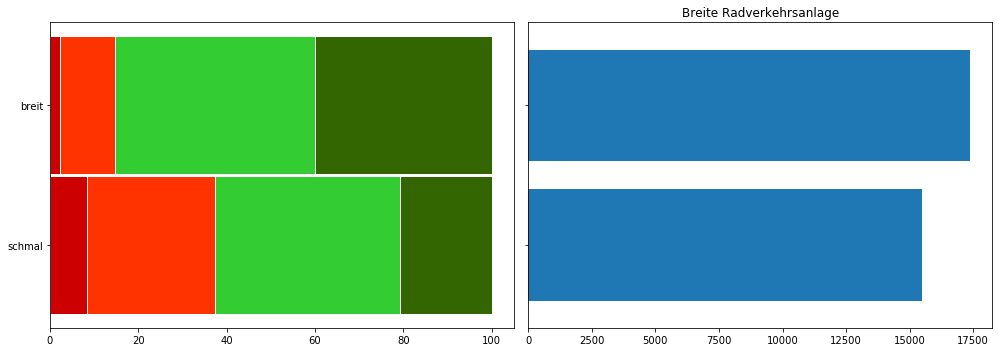

         unsafe  almost_unsafe  almost_safe       safe
group1  8.44420      28.958925    41.701111  20.895763
group2  2.23769      12.569029    45.124827  40.068454
Mittelwert von  schmal - 1.7504843709635753
Mittelwert von  breit - 2.2302404509894154
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -21.51140608238017
Ist der Unterschied signifikant? True
sicher Gruppe 1  58.763885300955835 sicher Gruppe2 82.9958582604694
Ergebnisse für Gruppe  w


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

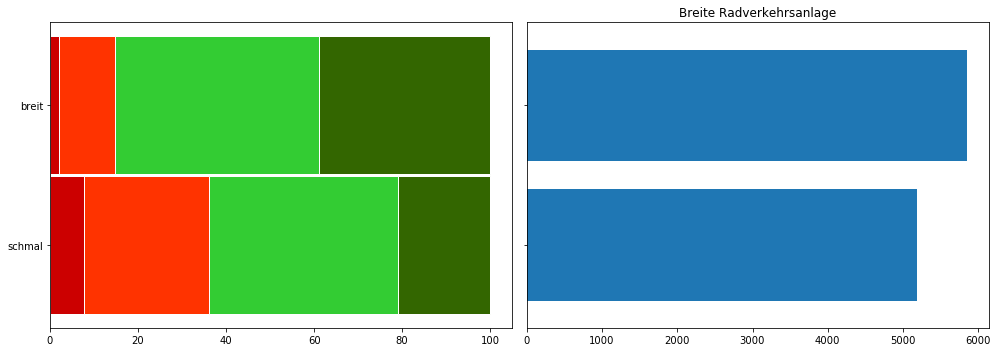

          unsafe  almost_unsafe  almost_safe       safe
group1  7.787201      28.286430    42.964534  20.961835
group2  1.957934      12.884747    46.169631  38.987688
Mittelwert von  schmal - 1.7710100231303008
Mittelwert von  breit - 2.2218707250342
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -20.291941237803528
Ist der Unterschied signifikant? True
sicher Gruppe 1  60.100231303006936 sicher Gruppe2 82.83173734610124
Ergebnisse für Gruppe  m


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

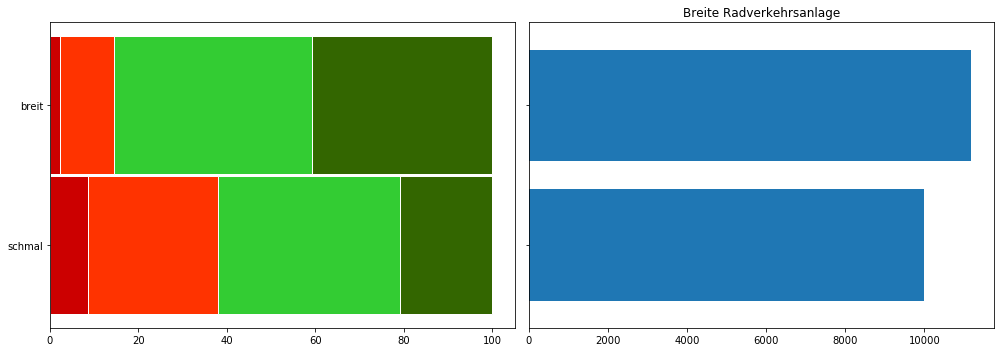

          unsafe  almost_unsafe  almost_safe       safe
group1  8.645000      29.280000    41.190000  20.885000
group2  2.283085      12.268787    44.696631  40.751497
Mittelwert von  schmal - 1.74315
Mittelwert von  breit - 2.2391654007684747
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -22.15179819223018
Ist der Unterschied signifikant? True
sicher Gruppe 1  58.18 sicher Gruppe2 83.32588687338041
Ergebnisse für Gruppe  u30


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

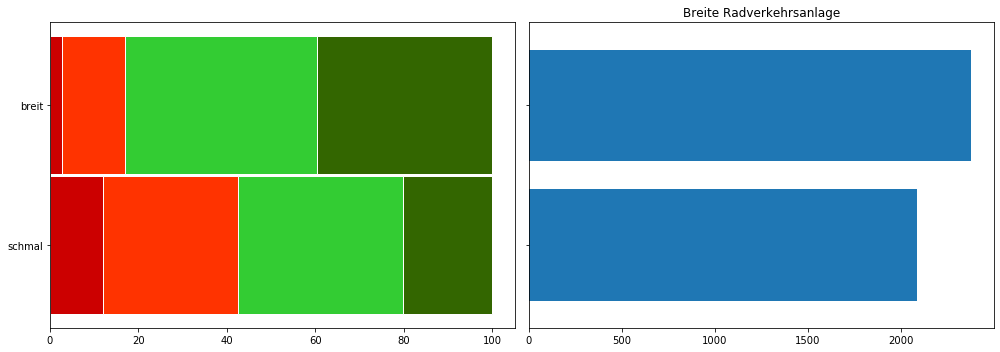

           unsafe  almost_unsafe  almost_safe       safe
group1  11.942446      30.455635    37.338129  20.263789
group2   2.753258      14.144599    43.505675  39.596469
Mittelwert von  schmal - 1.6592326139088729
Mittelwert von  breit - 2.199453551912568
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -24.56159792662764
Ist der Unterschied signifikant? True
sicher Gruppe 1  53.57314148681055 sicher Gruppe2 80.66414459857083
Ergebnisse für Gruppe  30-64


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

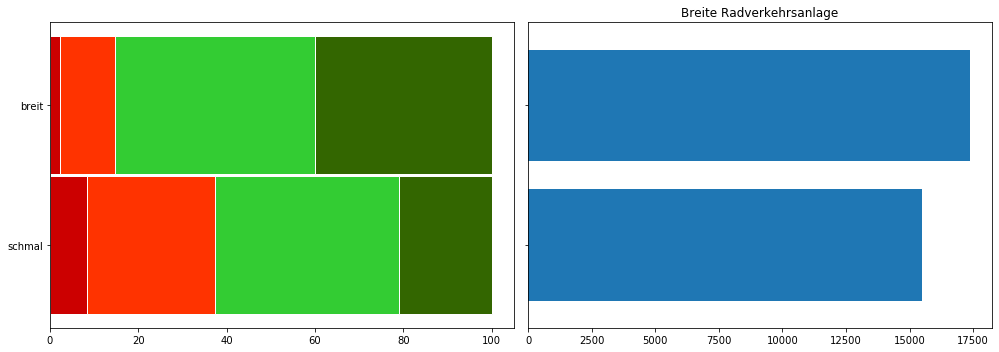

          unsafe  almost_unsafe  almost_safe       safe
group1  8.443741      28.963356    41.708137  20.884767
group2  2.236357      12.569077    45.121460  40.073106
Mittelwert von  schmal - 1.7503393007173786
Mittelwert von  breit - 2.2303131475938294
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -21.520468880985163
Ist der Unterschied signifikant? True
sicher Gruppe 1  58.760421379176634 sicher Gruppe2 82.99562514390973
Ergebnisse für Gruppe  Ü64


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

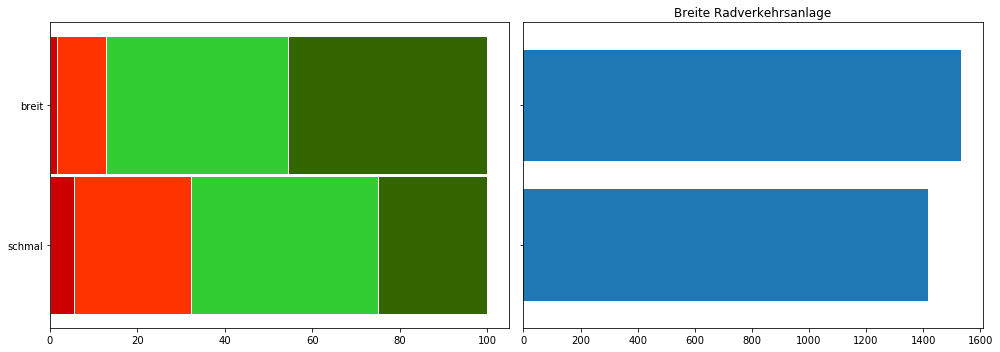

          unsafe  almost_unsafe  almost_safe       safe
group1  5.504587      26.676076    42.907551  24.911785
group2  1.600261      11.201829    41.639451  45.558459
Mittelwert von  schmal - 1.8722653493295696
Mittelwert von  breit - 2.3115610711952974
Bootstrap Ergebnis: -20.0    (-40.0, -20.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -19.004287939430043
Ist der Unterschied signifikant? True
sicher Gruppe 1  64.07904022582922 sicher Gruppe2 84.97713912475507
Ergebnisse für Gruppe  selten Rad


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

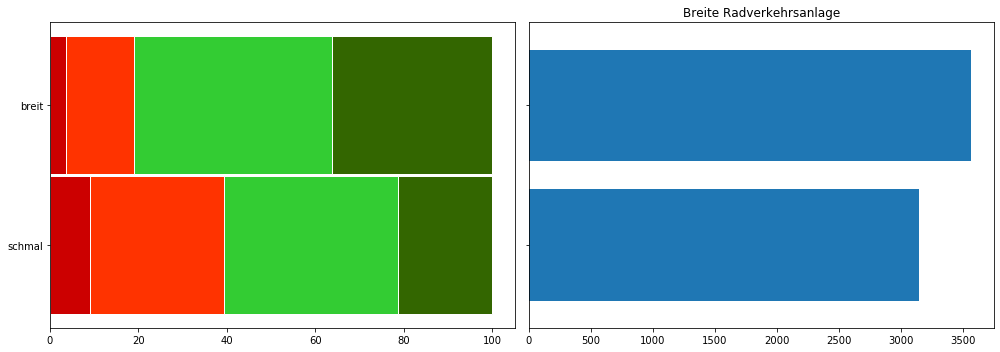

          unsafe  almost_unsafe  almost_safe       safe
group1  9.088020      30.346362    39.227836  21.337782
group2  3.559417      15.344731    44.786996  36.308857
Mittelwert von  schmal - 1.7281537972672387
Mittelwert von  breit - 2.138452914798206
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -19.186726754265948
Ist der Unterschied signifikant? True
sicher Gruppe 1  56.87956784238958 sicher Gruppe2 78.69955156950674
Ergebnisse für Gruppe  regelmäßig Rad


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

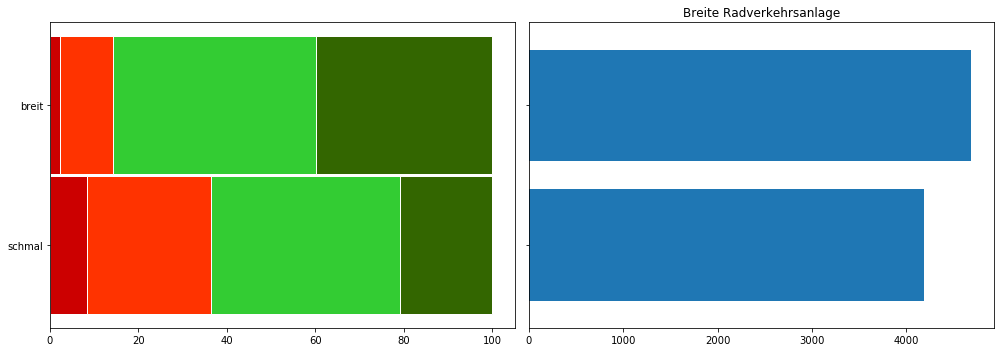

          unsafe  almost_unsafe  almost_safe       safe
group1  8.373149      28.057812    42.558528  21.010511
group2  2.259646      11.905777    45.907056  39.927521
Mittelwert von  schmal - 1.7620640229335882
Mittelwert von  breit - 2.2350245150287784
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -21.161311158553456
Ist der Unterschied signifikant? True
sicher Gruppe 1  59.72288580984233 sicher Gruppe2 83.64954167554893
Ergebnisse für Gruppe  oft Rad


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

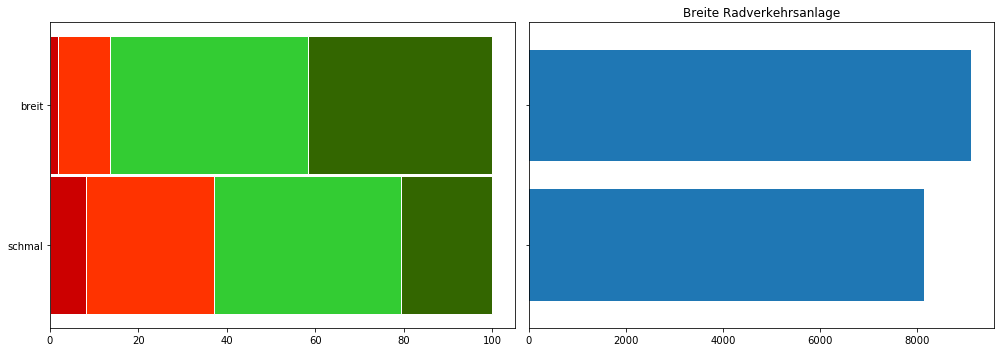

          unsafe  almost_unsafe  almost_safe       safe
group1  8.232119      28.886026    42.215679  20.666176
group2  1.709589      11.824658    44.854795  41.610959
Mittelwert von  schmal - 1.7531591215801743
Mittelwert von  breit - 2.263671232876712
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -22.5523964735714
Ist der Unterschied signifikant? True
sicher Gruppe 1  58.9988958410011 sicher Gruppe2 84.33972602739726


In [9]:
df = bike_data["ms"]
df = df[df["RVA-Breite"] != 0]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'w')
group1 = df_w[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_w[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ',  'm')
group1 = df_m[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_m[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'u30')
group1 = df_u30[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_u30[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print('Ergebnisse für Gruppe ', '30-64')
group1 = df_30_64[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_30_64[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'Ü64')
group1 = df_ue64[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_ue64[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'selten Rad')
group1 = df_Bs[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_Bs[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'regelmäßig Rad')
group1 = df_Br[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_Br[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'oft Rad')
group1 = df_Bo[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_Bo[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)


### c) Einflussfaktor "Tempolimit" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens)
Gruppe1: Kfz-Hauptverkehrsstraßen Tempolimt = "30"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Tempolimt = "50"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

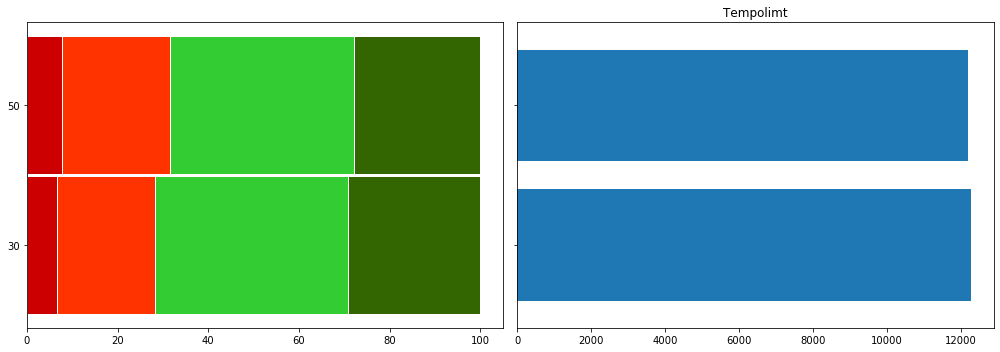

          unsafe  almost_unsafe  almost_safe       safe
group1  6.635978      21.521102    42.610396  29.232524
group2  7.761659      23.772642    40.603229  27.862470
Mittelwert von  30 - 1.9443946553690727
Mittelwert von  50 - 1.885665109417261
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von 30 zu 50 (in Prozent) 3.114526840344485
Ist der Unterschied signifikant? True
sicher Gruppe 1  68.81212318722503 sicher Gruppe2 65.4126710925334


In [10]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Geschwindigkeit"] == "30")] [["rating", "sessionID"]]
group2 = df[(df["FS-Geschwindigkeit"] == "50")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Tempolimt", ["30", "50"])
group_comparison(group1,group2)

#### c1) Einflussfaktor "Tempolimit" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) <br> *ohne RVA*
Gruppe1: Kfz-Hauptverkehrsstraßen Tempolimt = "30"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Tempolimt = "50"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

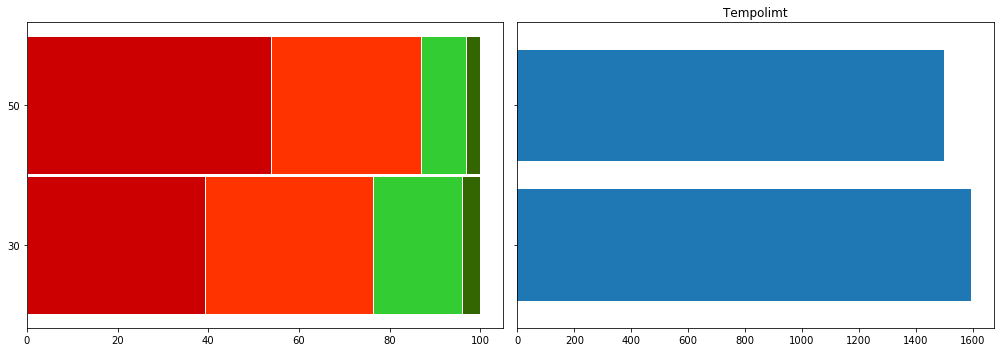

           unsafe  almost_unsafe  almost_safe      safe
group1  39.328311      36.974262    19.585687  4.111739
group2  53.805073      33.077437     9.979973  3.137517
Mittelwert von  30 - 0.8848085373509103
Mittelwert von  50 - 0.6244993324432577
Bootstrap Ergebnis: inf    (nan, nan)
Unterschied im Mittelwert von 30 zu 50 (in Prozent) 41.68286359718476
Ist der Unterschied signifikant? False
sicher Gruppe 1  23.603264281230384 sicher Gruppe2 12.950600801068092


C:\Users\NB\Anaconda3\lib\site-packages\bootstrapped\compare_functions.py:33: RuntimeWarning: divide by zero encountered in true_divide
  return (test_stat - ctrl_stat) * 100.0 / ctrl_stat
C:\Users\NB\Anaconda3\lib\site-packages\bootstrapped\compare_functions.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  return (test_stat - ctrl_stat) * 100.0 / ctrl_stat
C:\Users\NB\Anaconda3\lib\site-packages\bootstrapped\bootstrap.py:90: RuntimeWarning: invalid value encountered in double_scalars
  low = 2 * stat_val - _np.percentile(bootstrap_dist, 100 * (1 - alpha / 2.))
C:\Users\NB\Anaconda3\lib\site-packages\bootstrapped\bootstrap.py:92: RuntimeWarning: invalid value encountered in double_scalars
  high = 2 * stat_val - _np.percentile(bootstrap_dist, 100 * (alpha / 2.))
C:\Users\NB\Anaconda3\lib\site-packages\bootstrapped\bootstrap.py:67: RuntimeWarning: invalid value encountered in sign
  return _np.sign(self.upper_bound) == _np.sign(self.lower_bound)


In [11]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz")& (df["RVA-Breite"] == 0) & (df["RVA-Lage"] != "Parken-Seitenraum")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Geschwindigkeit"] == "30")] [["rating", "sessionID"]]
group2 = df[(df["FS-Geschwindigkeit"] == "50")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Tempolimt", ["30", "50"])
group_comparison(group1,group2)

#### c2) Einflussfaktor "Tempolimit" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) <br> *mit RVA*
Gruppe1: Kfz-Hauptverkehrsstraßen Tempolimt = "30"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Tempolimt = "50"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

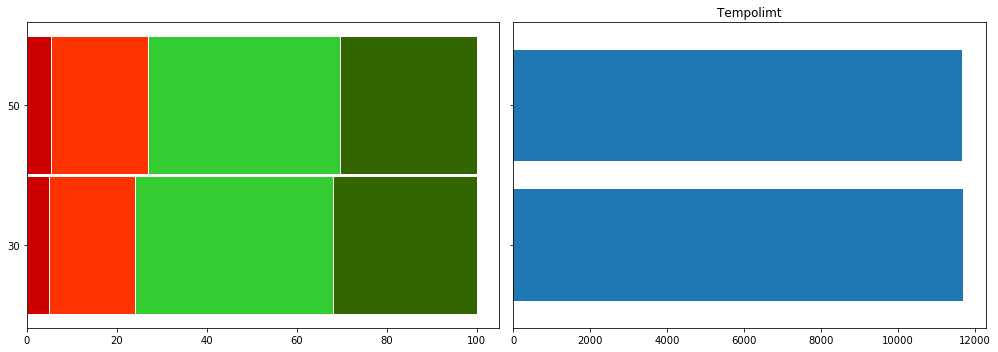

          unsafe  almost_unsafe  almost_safe       safe
group1  4.854161      19.202806    43.961167  31.981866
group2  5.254136      21.625096    42.714494  30.406274
Mittelwert von  30 - 2.030707381746643
Mittelwert von  50 - 1.9827290648838605
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von 30 zu 50 (in Prozent) 2.4198120516073973
Ist der Unterschied signifikant? True
sicher Gruppe 1  73.2871439568899 sicher Gruppe2 70.32656209822576


In [12]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Geschwindigkeit"] == "30")] [["rating", "sessionID"]]
group2 = df[(df["FS-Geschwindigkeit"] == "50")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Tempolimt", ["30", "50"])
group_comparison(group1,group2)

### d) Einflussfaktor "Verkehrsaufkommen" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens)
Gruppe1: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "viel"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "normal"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

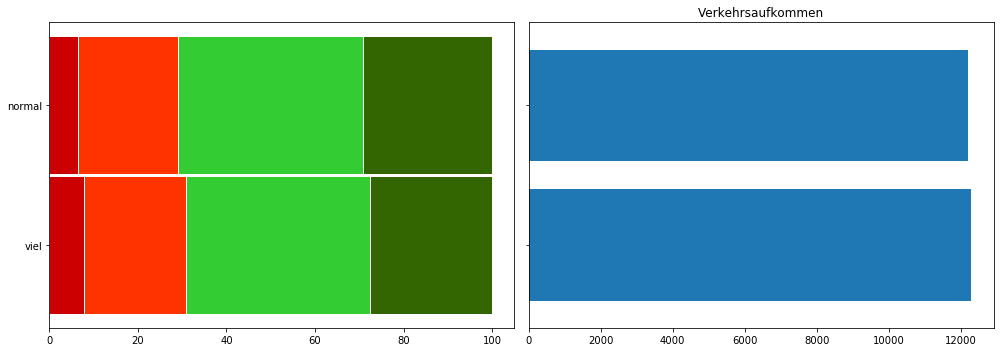

          unsafe  almost_unsafe  almost_safe       safe
group1  7.900089      23.053454    41.571068  27.475388
group2  6.464315      22.555373    41.825267  29.155045
Mittelwert von  viel - 1.886217557562444
Mittelwert von  normal - 1.9367104183757178
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von viel zu normal (in Prozent) -2.6071456183739206
Ist der Unterschied signifikant? True
sicher Gruppe 1  66.05646407940769 sicher Gruppe2 67.93273174733389


In [13]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Aufkommen"] == "viel")] [["rating", "sessionID"]]
group2 = df[(df["FS-Aufkommen"] == "normal")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Verkehrsaufkommen", ["viel", "normal"])
group_comparison(group1,group2)

#### d0.1) Einflussfaktor ""Verkehrsaufkommen" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) 
Gruppe1: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "viel"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "Einbahnstraße (4-spurig)"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

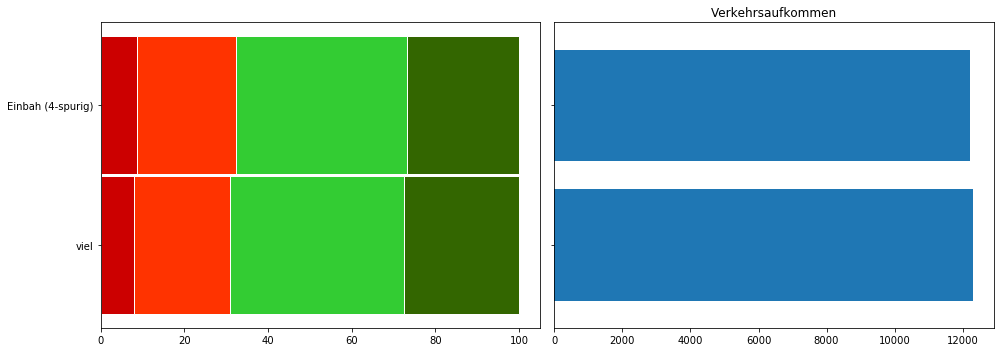

          unsafe  almost_unsafe  almost_safe       safe
group1  7.900089      23.053454    41.571068  27.475388
group2  8.632976      23.638300    40.887870  26.840855
Mittelwert von  viel - 1.886217557562444
Mittelwert von  Einbah (4-spurig) - 1.8593660414448359
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von viel zu Einbah (4-spurig) (in Prozent) 1.4441221103910755
Ist der Unterschied signifikant? True
sicher Gruppe 1  66.05646407940769 sicher Gruppe2 64.56712261446475


In [14]:
df = bike_data["ms"]
df = df[(df["FS-Aufkommen"] == "viel") & (df["RVA-Lage"] != "Parken-Seitenraum")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Art"] == "Kfz")] [["rating", "sessionID"]]
group2 = df[(df["FS-Art"] == "Einbahn")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Verkehrsaufkommen", ["viel", "Einbah (4-spurig)"])
group_comparison(group1,group2)

#### d1) Einflussfaktor ""Verkehrsaufkommen" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) <br> *ohne RVA*
Gruppe1: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "viel"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "normal"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

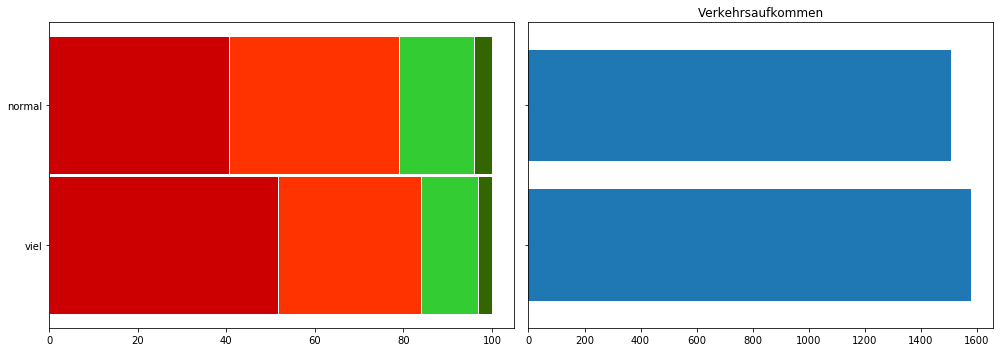

           unsafe  almost_unsafe  almost_safe      safe
group1  51.709943      32.140595    12.982901  3.166561
group2  40.604250      38.346614    16.998672  4.050465
Mittelwert von  viel - 0.6760607979734009
Mittelwert von  normal - 0.8449535192563081
Bootstrap Ergebnis: -100.0    (-200.0, -100.0)
Unterschied im Mittelwert von viel zu normal (in Prozent) -19.988403791910276
Ist der Unterschied signifikant? True
sicher Gruppe 1  16.022799240025332 sicher Gruppe2 20.783532536520582


In [15]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz")& (df["RVA-Breite"] == 0) & (df["RVA-Lage"] != "Parken-Seitenraum")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Aufkommen"] == "viel")] [["rating", "sessionID"]]
group2 = df[(df["FS-Aufkommen"] == "normal")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Verkehrsaufkommen", ["viel", "normal"])
group_comparison(group1,group2)

#### d2) Einflussfaktor ""Verkehrsaufkommen" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) <br> mit RVA

Gruppe1: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "viel" <br>
Gruppe2: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "normal"


Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

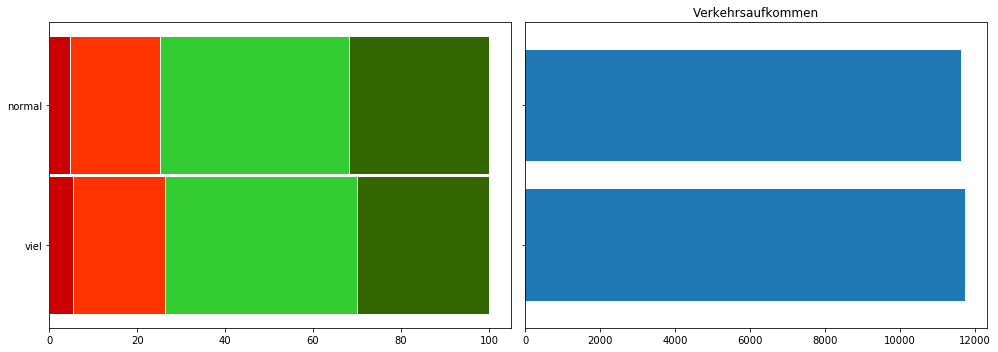

          unsafe  almost_unsafe  almost_safe       safe
group1  5.480736      20.797818    43.594443  30.127003
group2  4.763746      20.317869    43.101375  31.817010
Mittelwert von  viel - 1.9836771224002727
Mittelwert von  normal - 2.019716494845361
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von viel zu normal (in Prozent) -1.7843777845586988
Ist der Unterschied signifikant? True
sicher Gruppe 1  71.02795772246846 sicher Gruppe2 72.13058419243985


In [16]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Aufkommen"] == "viel")] [["rating", "sessionID"]]
group2 = df[(df["FS-Aufkommen"] == "normal")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Verkehrsaufkommen", ["viel", "normal"])
group_comparison(group1,group2)

### e) Einflussfaktor "Parken" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens)
Gruppe1: Kfz-Hauptverkehrsstraßen Parken = "ja"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Parken = "nein"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

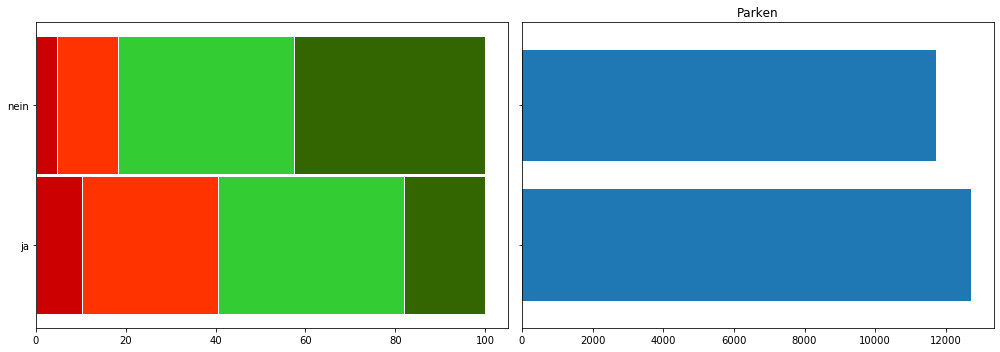

           unsafe  almost_unsafe  almost_safe       safe
group1  10.141565      30.330319    41.513960  18.014157
group2   4.594318      13.774422    39.100759  42.530501
Mittelwert von  ja - 1.6740070782540306
Mittelwert von  nein - 2.1956744305093423
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -23.75886629668943
Ist der Unterschied signifikant? True
sicher Gruppe 1  56.00471883602045 sicher Gruppe2 79.57512157665727


In [17]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Parken"] == "Parken längs")] [["rating", "sessionID"]]
group2 = df[(df["Parken"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Parken", ["ja", "nein"])
group_comparison(group1,group2)

#### e1) Einflussfaktor "Parken" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) <br> ohne RVA

Gruppe1: Kfz-Hauptverkehrsstraßen Parken = "ja"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Parken = "nein"


Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

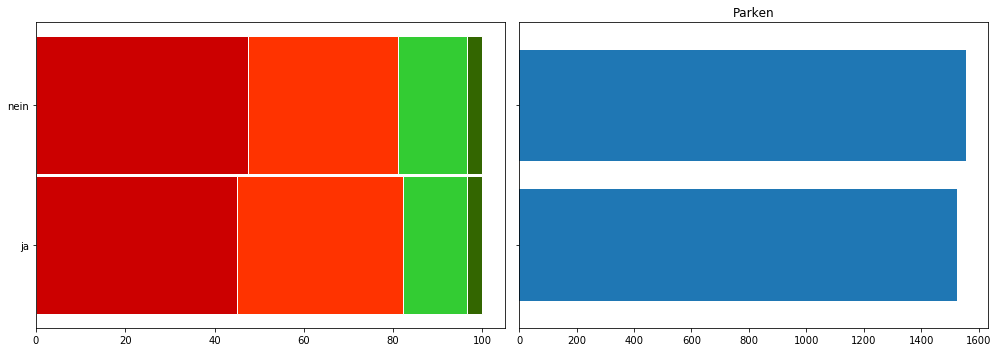

           unsafe  almost_unsafe  almost_safe      safe
group1  45.085190      37.155963    14.384010  3.374836
group2  47.491961      33.665595    15.273312  3.569132
Mittelwert von  ja - 0.7604849279161205
Mittelwert von  nein - 0.7491961414790996
Bootstrap Ergebnis: 0.0    (-100.0, 0.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) 1.5067865158427058
Ist der Unterschied signifikant? False
sicher Gruppe 1  17.562254259501966 sicher Gruppe2 18.649517684887464


C:\Users\NB\Anaconda3\lib\site-packages\bootstrapped\compare_functions.py:33: RuntimeWarning: divide by zero encountered in true_divide
  return (test_stat - ctrl_stat) * 100.0 / ctrl_stat


In [18]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] == 0)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Parken"] == "Parken längs")] [["rating", "sessionID"]]
group2 = df[(df["Parken"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Parken", ["ja", "nein"])
group_comparison(group1,group2)

#### e2) Einflussfaktor "Parken" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) <br> mit RVA

Gruppe1: Kfz-Hauptverkehrsstraßen Parken = "ja"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Parken = "nein"


Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

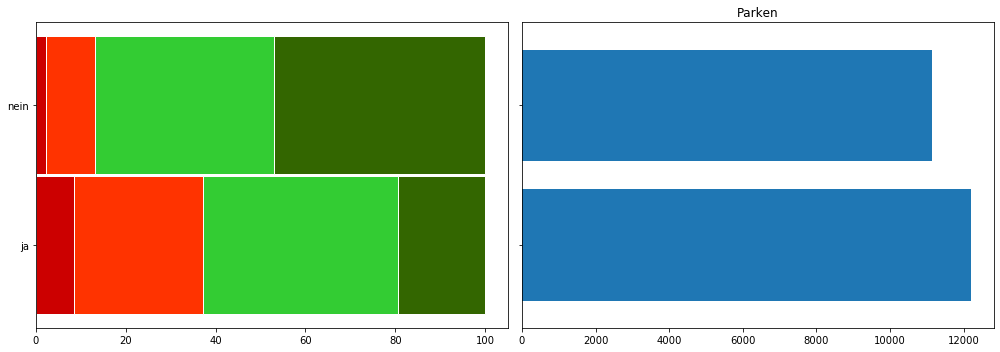

          unsafe  almost_unsafe  almost_safe       safe
group1  8.362012      28.728286    43.477548  19.432153
group2  2.219028      10.866050    39.987423  46.927500
Mittelwert von  ja - 1.7397984267453295
Mittelwert von  nein - 2.316233941245171
Bootstrap Ergebnis: -20.0    (-40.0, -20.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -24.886757085942662
Ist der Unterschied signifikant? True
sicher Gruppe 1  59.61979678793837 sicher Gruppe2 85.47300332404996


In [19]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Parken"] == "Parken längs")] [["rating", "sessionID"]]
group2 = df[(df["Parken"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Parken", ["ja", "nein"])
group_comparison(group1,group2)

#### e2.1) Einflussfaktor "Parken" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) <br> mit RVA, ohne baul. Trennung

Gruppe1: Kfz-Hauptverkehrsstraßen Parken = "ja"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Parken = "nein"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

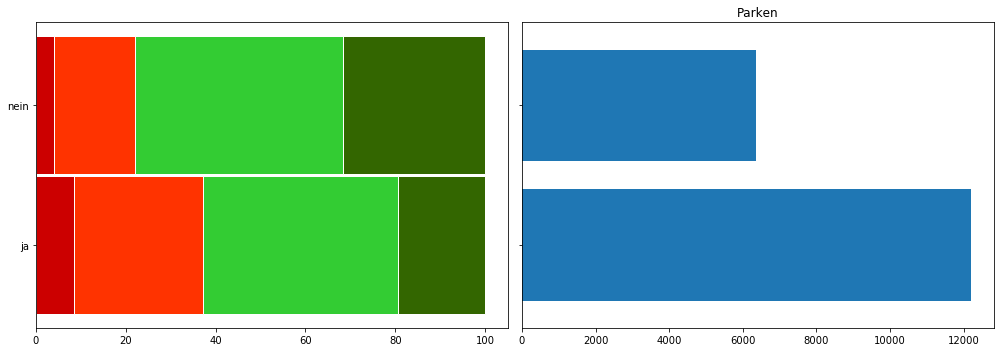

          unsafe  almost_unsafe  almost_safe       safe
group1  8.362012      28.728286    43.477548  19.432153
group2  4.057880      17.882982    46.429695  31.629443
Mittelwert von  ja - 1.7397984267453295
Mittelwert von  nein - 2.0563070147845233
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -15.392088134872223
Ist der Unterschied signifikant? True
sicher Gruppe 1  59.61979678793837 sicher Gruppe2 76.89525007864108
RVA-Breite mit Parken


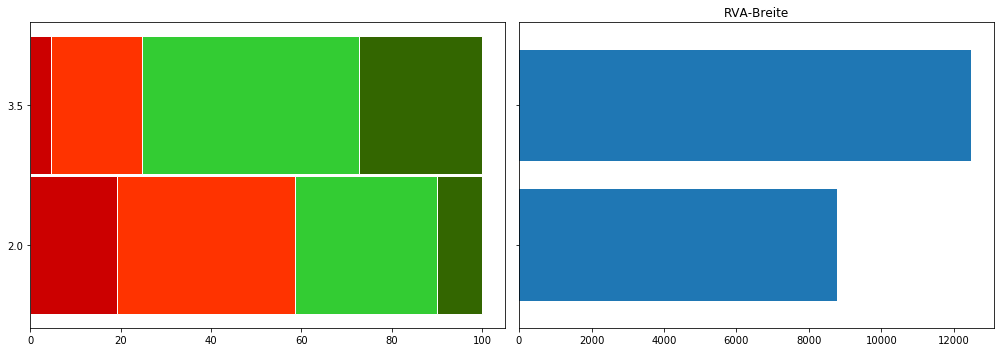

        unsafe  almost_unsafe  almost_safe       safe
2.0  19.220690      39.432608    31.377464   9.969238
3.5   4.514474      20.134713    48.199824  27.150990
RVA-Breite ohne Parken


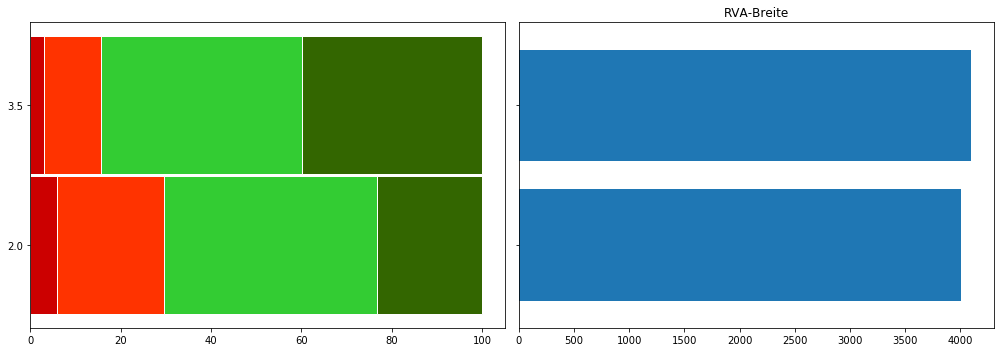

       unsafe  almost_unsafe  almost_safe       safe
2.0  5.986530      23.522075    47.318533  23.172861
3.5  3.001464      12.591508    44.558321  39.848707


In [20]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df["Tr_li-baulTrennung"] =="-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Parken"] == "Parken längs")] [["rating", "sessionID"]]
group2 = df[(df["Parken"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Parken", ["ja", "nein"])
group_comparison(group1,group2)

print ('RVA-Breite mit Parken')
df_mP=df[(df["Parken"] == "Parken längs")]
likert_plot (df_mP[["RVA-Breite","rating"]])

print ('RVA-Breite ohne Parken')
df_oP=df[(df["Parken"] == "-")]
likert_plot (df_oP[["RVA-Breite","rating"]])

### f) Einflussfaktor "Trennung links (zu fließendem Verkehr)"  (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - ohne bauliche Trennung)
Gruppe1: Kfz-Hauptverkehrsstraßen Parken = "schmal"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Parken = "breit"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

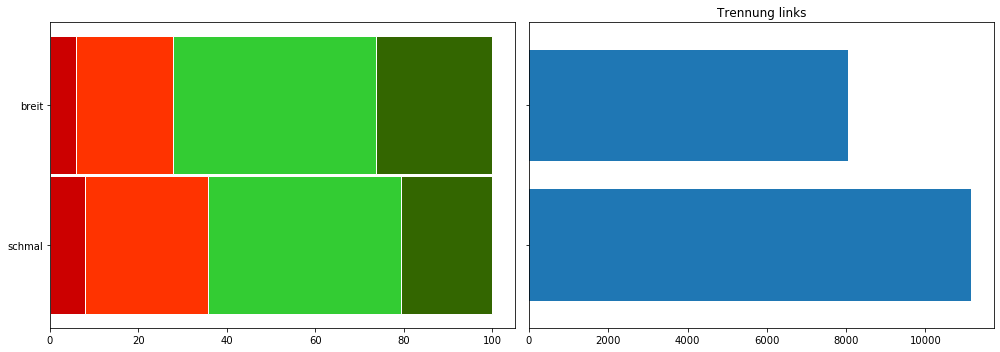

          unsafe  almost_unsafe  almost_safe       safe
group1  7.934588      27.786738    43.517025  20.761649
group2  5.862584      21.875778    45.898681  26.362957
Mittelwert von  schmal - 1.771057347670251
Mittelwert von  breit - 1.9276201145133185
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -8.122075800324184
Ist der Unterschied signifikant? True
sicher Gruppe 1  61.335125448028684 sicher Gruppe2 70.30121981578291


In [21]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df["Tr_li-baulTrennung"] =="-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-Breite"] == 0.75)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung links", ["schmal", "breit"])
group_comparison(group1,group2)

#### f1) Einflussfaktor "Trennung links" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - ohne baul. Trennung) <br>mit Parken <br>
Gruppe1: Kfz-Hauptverkehrsstraßen Trennung links = "schmal"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Trennung links = "breit"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

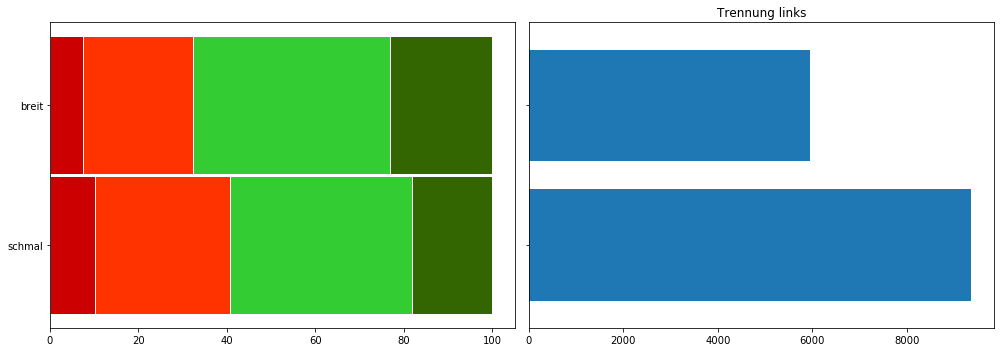

           unsafe  almost_unsafe  almost_safe       safe
group1  10.099285      30.559411    41.203160  18.138145
group2   7.377187      24.899058    44.633244  23.090511
Mittelwert von  schmal - 1.673801644069606
Mittelwert von  breit - 1.8343707940780618
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -8.753363852435104
Ist der Unterschied signifikant? True
sicher Gruppe 1  56.677698302551505 sicher Gruppe2 66.18438761776582


In [22]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df["Tr_li-baulTrennung"] =="-") & (df["Parken"] !="-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-Breite"] == 0.75)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung links", ["schmal", "breit"])
group_comparison(group1,group2)

#### f2) Einflussfaktor "Trennung links" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - ohne baul. Trennung) <br>ohne Parken <br>
Gruppe1: Kfz-Hauptverkehrsstraßen Trennung links = "schmal"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Trennung links = "breit"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

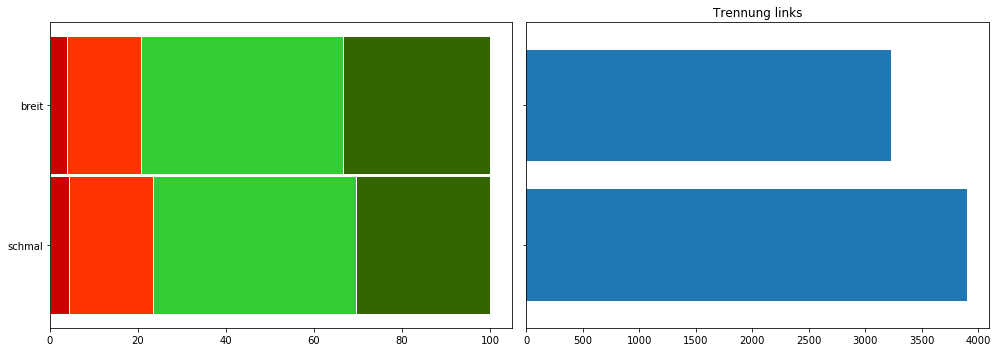

          unsafe  almost_unsafe  almost_safe      safe
group1  4.376283      19.109343    45.995893  30.51848
group2  3.933106      16.646020    46.097863  33.32301
Mittelwert von  schmal - 2.0265657084188913
Mittelwert von  breit - 2.0881077733044284
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -2.947264775905072
Ist der Unterschied signifikant? True
sicher Gruppe 1  75.64168377823408 sicher Gruppe2 78.90987921957263


In [23]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df["Tr_li-baulTrennung"] =="-") & (df["Parken"] =="-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-Breite"] == 0.75)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung links", ["schmal", "breit"])
group_comparison(group1,group2)

#### f3) Einflussfaktor "Trennung links - schmal" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - ohne baul. Trennung) 
Gruppe1: Kfz-Hauptverkehrsstraßen Trennung links = "durchgezogen"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Trennung links = "unterbrochen"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

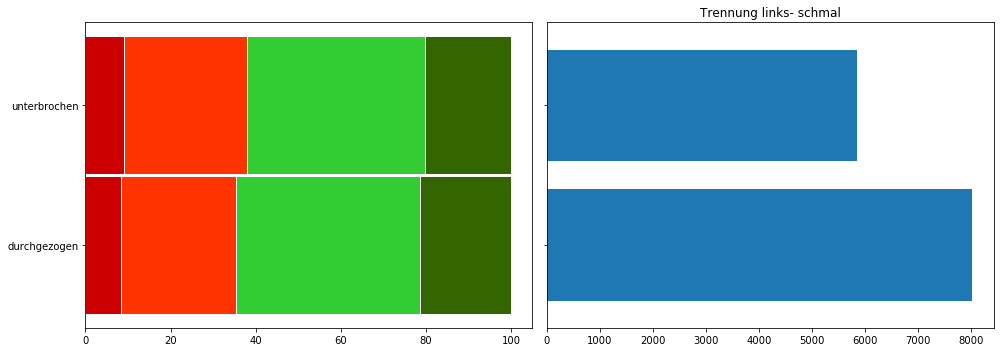

          unsafe  almost_unsafe  almost_safe       safe
group1  8.356199      26.908207    43.290097  21.445498
group2  9.163108      28.710504    41.929974  20.196413
Mittelwert von  durchgezogen - 1.7782489398852581
Mittelwert von  unterbrochen - 1.731596925704526
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von durchgezogen zu unterbrochen (in Prozent) 2.694161296327723
Ist der Unterschied signifikant? True
sicher Gruppe 1  62.5966575205787 sicher Gruppe2 60.46114432109307


In [24]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df["Tr_li-Breite"] == 0.25) & (df["Tr_li-baulTrennung"] =="-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li-Markierung"] == "durchgezogen")] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-Markierung"] == "unterbrochen")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung links- schmal", ["durchgezogen", "unterbrochen"])
group_comparison(group1,group2)

#### f4) Einflussfaktor "Trennung links - breit" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - ohne baul. Trennung) 
Gruppe1: Kfz-Hauptverkehrsstraßen Trennung links = "Sperrfläche"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Trennung links = "Doppellinie"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

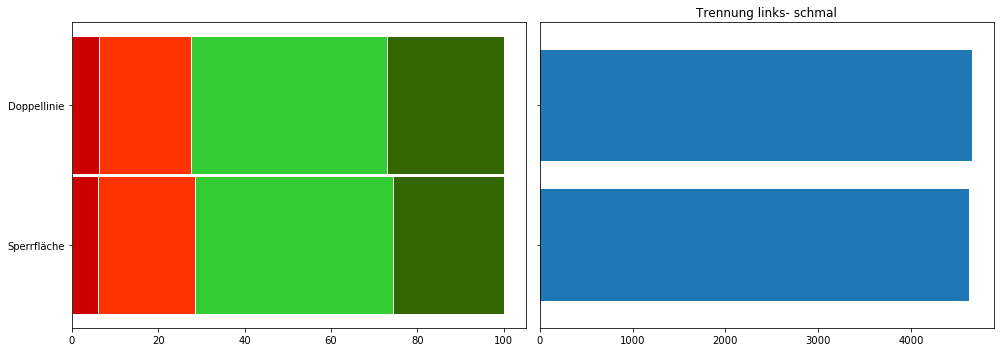

          unsafe  almost_unsafe  almost_safe       safe
group1  6.185121      22.296713    45.858564  25.659602
group2  6.216448      21.397896    45.404767  26.980889
Mittelwert von  Sperrfläche - 1.9099264705882353
Mittelwert von  Doppellinie - 1.9315009662873095
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Sperrfläche zu Doppellinie (in Prozent) -1.1169808390282225
Ist der Unterschied signifikant? True
sicher Gruppe 1  70.28546712802768 sicher Gruppe2 71.0543268198411


In [25]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df["Tr_li-Breite"] == 0.75) & (df["Tr_li-baulTrennung"] =="-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li-Markierung"] == "Sperrfläche")] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-Markierung"] == "Doppellinie")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung links- schmal", ["Sperrfläche", "Doppellinie"])
group_comparison(group1,group2)

#### f5) Einflussfaktor "Trennung links - baul. Trennung" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens ) 
Gruppe1: Kfz-Hauptverkehrsstraßen baul. Trennung = ja <br>
Gruppe2: Kfz-Hauptverkehrsstraßen baul. Trennung = nein

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

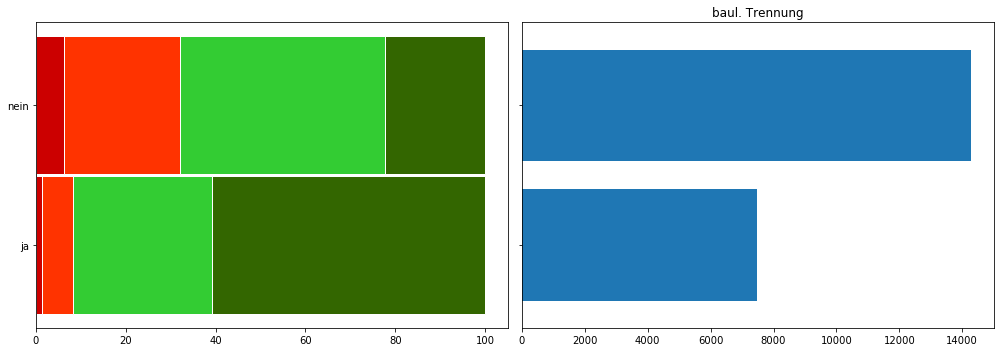

          unsafe  almost_unsafe  almost_safe       safe
group1  1.366559       6.879689    30.908360  60.845391
group2  6.221553      25.754499    45.763602  22.260346
Mittelwert von  ja - 2.512325830653805
Mittelwert von  nein - 1.8406274070443247
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) 36.49290568198656
Ist der Unterschied signifikant? True
sicher Gruppe 1  91.19774919614146 sicher Gruppe2 64.43526363700022


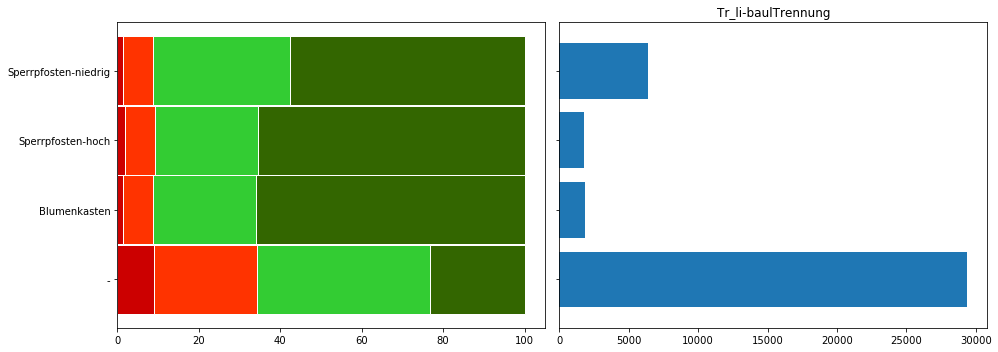

                        unsafe  almost_unsafe  almost_safe       safe
-                     8.901380      25.314257    42.541305  23.243059
Blumenkasten          1.466594       7.224335    25.312330  65.996741
Sperrpfosten-hoch     1.895462       7.352096    25.272832  65.479609
Sperrpfosten-niedrig  1.396078       7.325490    33.662745  57.615686


In [26]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li-baulTrennung"] !="-")] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-baulTrennung"] =="-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "baul. Trennung", ["ja", "nein"])
group_comparison(group1,group2)

likert_plot (df[["Tr_li-baulTrennung","rating"]])


#### f5.1) Einflussfaktor "Trennung links - baul. Trennung" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens )  <br> ohne Parken
Gruppe1: Kfz-Hauptverkehrsstraßen baul. Trennung = ja <br>
Gruppe2: Kfz-Hauptverkehrsstraßen baul. Trennung = nein

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

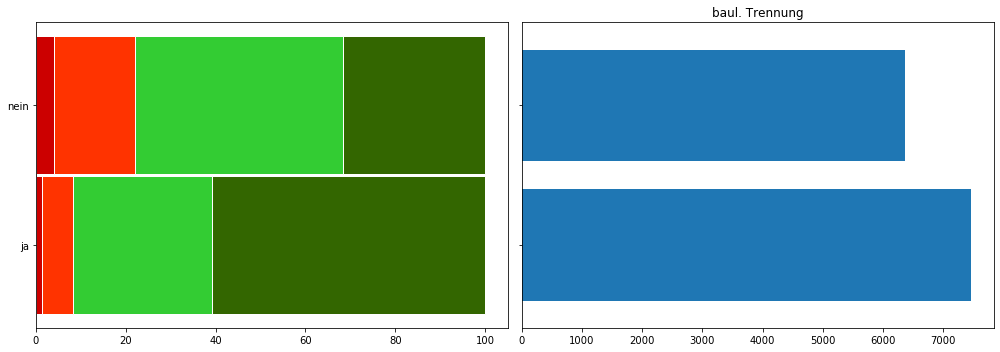

          unsafe  almost_unsafe  almost_safe       safe
group1  1.366559       6.879689    30.908360  60.845391
group2  4.057880      17.882982    46.429695  31.629443
Mittelwert von  ja - 2.512325830653805
Mittelwert von  nein - 2.0563070147845233
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) 22.176591948117586
Ist der Unterschied signifikant? True
sicher Gruppe 1  91.19774919614146 sicher Gruppe2 76.89525007864108


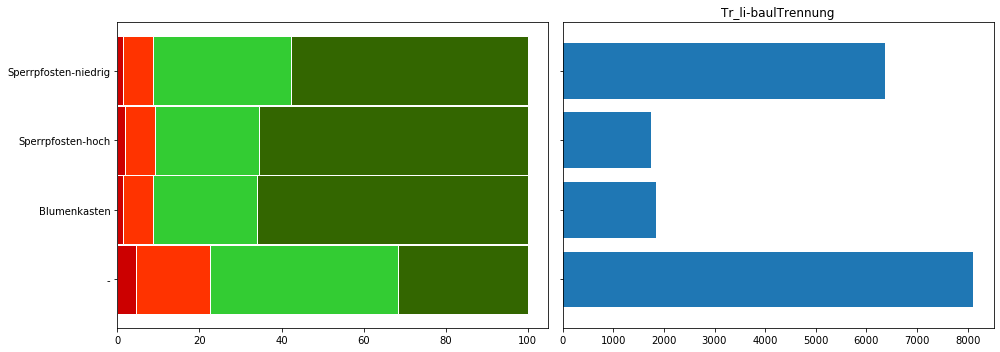

                        unsafe  almost_unsafe  almost_safe       safe
-                     4.477612      17.996793    45.923276  31.602319
Blumenkasten          1.466594       7.224335    25.312330  65.996741
Sperrpfosten-hoch     1.895462       7.352096    25.272832  65.479609
Sperrpfosten-niedrig  1.396078       7.325490    33.662745  57.615686


In [27]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df ["Parken"] == "-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li-baulTrennung"] !="-")] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-baulTrennung"] =="-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "baul. Trennung", ["ja", "nein"])
group_comparison(group1,group2)

likert_plot (df[["Tr_li-baulTrennung","rating"]])

#### f5.1) Einflussfaktor "Trennung links - baul. Trennung" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens )  <br> ohne Parken
Gruppe1: Kfz-Hauptverkehrsstraßen Breite RVA = schmal <br>
Gruppe2: Kfz-Hauptverkehrsstraßen Breite RVA = breit

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

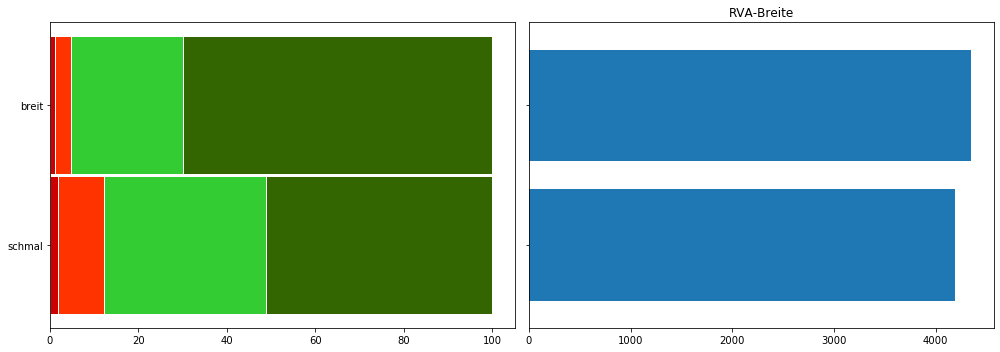

          unsafe  almost_unsafe  almost_safe       safe
group1  1.778043      10.369928     36.76611  51.085919
group2  1.137147       3.664140     25.23547  69.963244
Mittelwert von  schmal - 2.3715990453460623
Mittelwert von  breit - 2.640248104755341
Bootstrap Ergebnis: -16.666666666666668    (-33.333333333333336, -16.666666666666668)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -10.175144484543553
Ist der Unterschied signifikant? True
sicher Gruppe 1  87.49403341288783 sicher Gruppe2 94.94601424305077


In [28]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df ["Parken"] == "-") & (df["Tr_li-baulTrennung"] !="-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "RVA-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

### g) Einflussfaktor "Trennung rechts (zu ruhendem Verkehr)"  (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - mit Parken)
Gruppe1: Kfz-Hauptverkehrsstraßen Trennung rechts = "schmal"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Trennung rechts = "breit"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

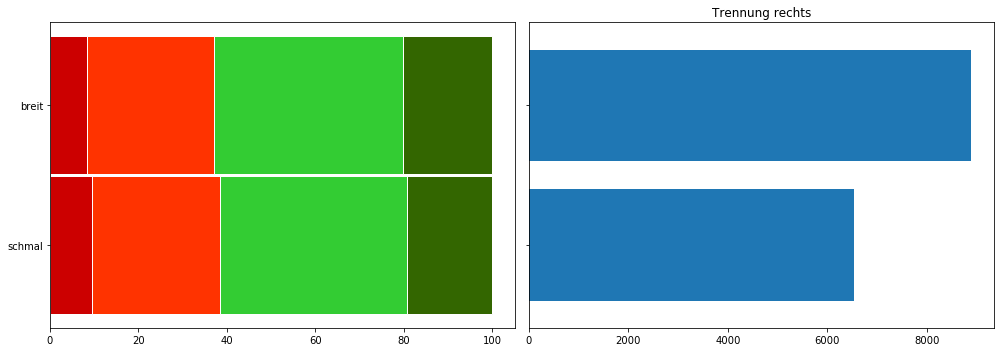

          unsafe  almost_unsafe  almost_safe       safe
group1  9.448698      28.897397    42.327718  19.326187
group2  8.412003      28.601933    42.824230  20.161834
Mittelwert von  schmal - 1.7153139356814702
Mittelwert von  breit - 1.7473589570690042
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -1.8339117591090697
Ist der Unterschied signifikant? True
sicher Gruppe 1  59.709035222052066 sicher Gruppe2 60.49674084063835


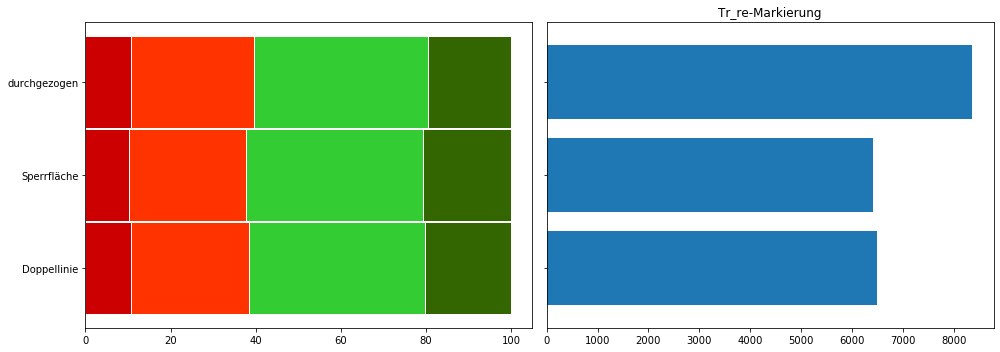

                 unsafe  almost_unsafe  almost_safe       safe
Doppellinie   10.756173      27.608025    41.311728  20.324074
Sperrfläche   10.224789      27.567905    41.617234  20.590072
durchgezogen  10.739058      28.904568    40.923224  19.433150


In [29]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df ["Parken"] != "-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_re-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Breite"] == 0.75)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts", ["schmal", "breit"])
group_comparison(group1,group2)

likert_plot (df[["Tr_re-Markierung","rating"]])

#### g1) Einflussfaktor "Trennung rechts (zu ruhendem Verkehr)"  (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - mit Parken) <br>schmale RVA
Gruppe1: Kfz-Hauptverkehrsstraßen Trennung rechts = "schmal"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Trennung rechts = "breit"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

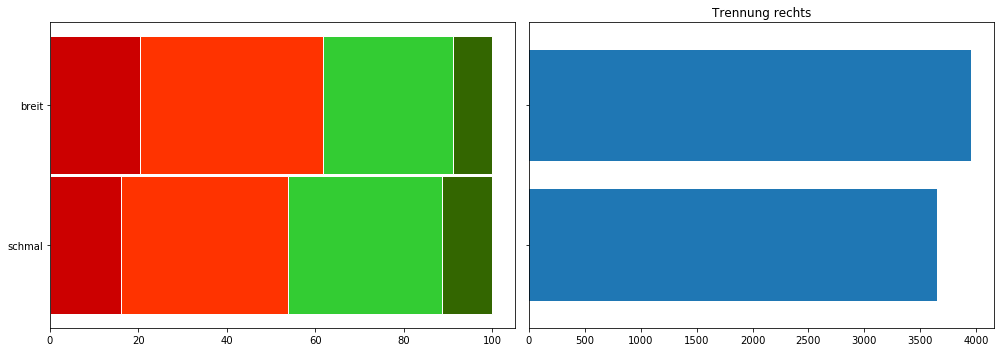

           unsafe  almost_unsafe  almost_safe       safe
group1  16.095890      37.684932    34.739726  11.479452
group2  20.351187      41.371905    29.358262   8.918646
Mittelwert von  schmal - 1.416027397260274
Mittelwert von  breit - 1.26844365841334
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) 11.635025163951086
Ist der Unterschied signifikant? True
sicher Gruppe 1  45.28767123287671 sicher Gruppe2 37.417887822132386


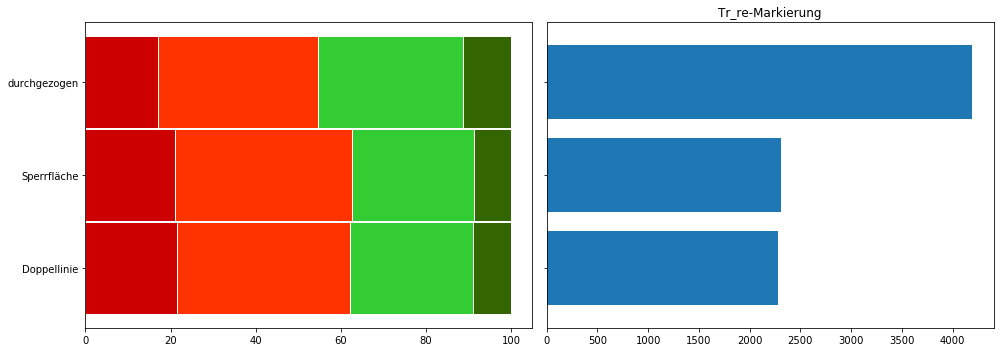

                 unsafe  almost_unsafe  almost_safe       safe
Doppellinie   21.485062      40.553603    28.910369   9.050967
Sperrfläche   20.936281      41.742523    28.695275   8.625921
durchgezogen  17.048164      37.553648    34.191702  11.206485


In [30]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] == 2.0) & (df ["Parken"] != "-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_re-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Breite"] == 0.75)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts", ["schmal", "breit"])
group_comparison(group1,group2)

likert_plot (df[["Tr_re-Markierung","rating"]])

#### g2) Einflussfaktor "Trennung rechts (zu ruhendem Verkehr)"  (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - mit Parken) <br>breite RVA
Gruppe1: Kfz-Hauptverkehrsstraßen Trennung rechts = "schmal"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Trennung rechts = "breit"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

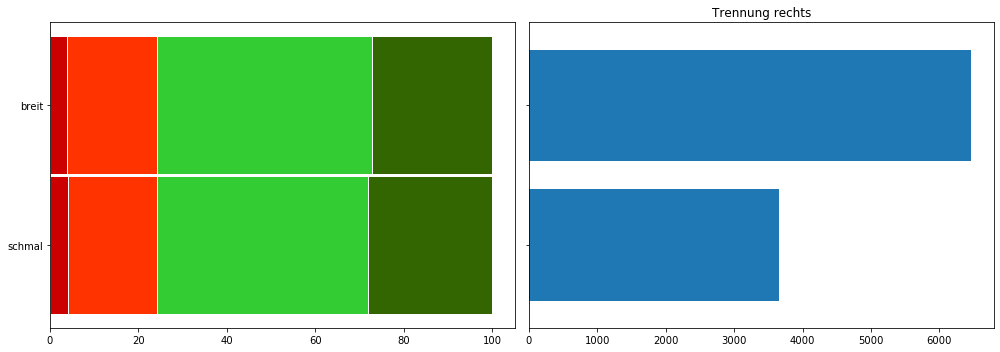

          unsafe  almost_unsafe  almost_safe       safe
group1  4.095004      20.106470    47.706798  28.091728
group2  3.863988      20.285935    48.701700  27.148377
Mittelwert von  schmal - 1.9979524979524979
Mittelwert von  breit - 1.9913446676970634
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) 0.3318275516350573
Ist der Unterschied signifikant? True
sicher Gruppe 1  74.99317499317499 sicher Gruppe2 74.69860896445132


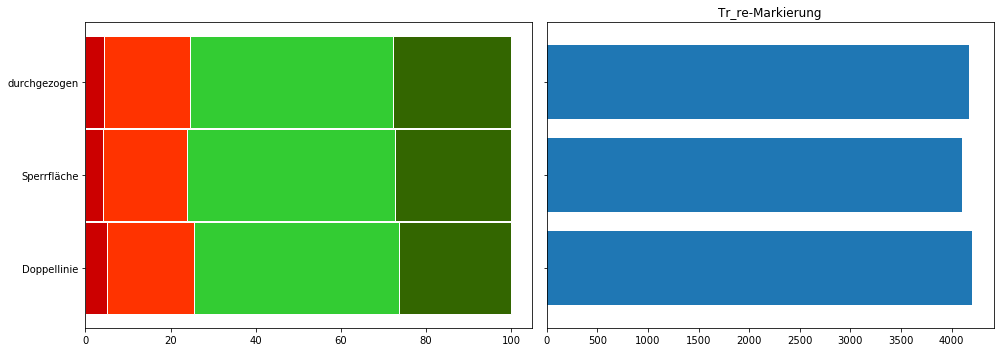

                unsafe  almost_unsafe  almost_safe       safe
Doppellinie   4.947669      20.599429    48.025690  26.427212
Sperrfläche   4.196145      19.590144    48.889973  27.323737
durchgezogen  4.390595      20.201536    47.696737  27.711132


In [31]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] == 3.5) & (df ["Parken"] != "-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_re-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Breite"] == 0.75)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts", ["schmal", "breit"])
group_comparison(group1,group2)

likert_plot (df[["Tr_re-Markierung","rating"]])

### h) Grüneinfärbung (nur RVA)
Gruppe1: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt-farbig"

<Figure size 432x288 with 0 Axes>

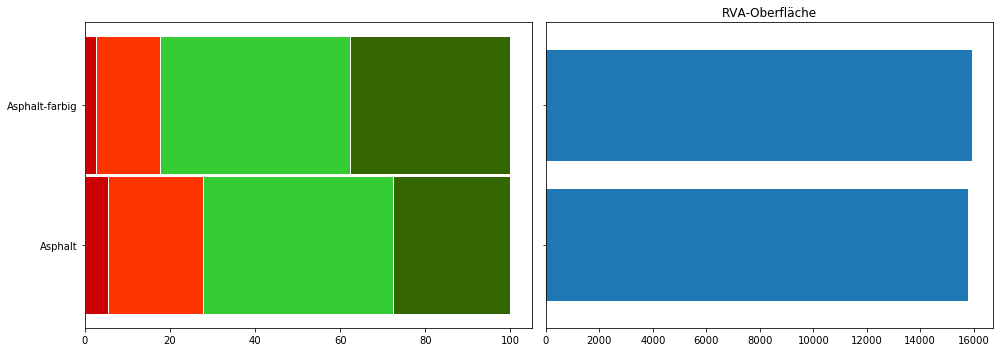

          unsafe  almost_unsafe  almost_safe       safe
group1  5.451437      22.407243    44.497911  27.643409
group2  2.735209      14.969853    44.535862  37.759075
Mittelwert von  Asphalt - 1.9433329112321134
Mittelwert von  Asphalt-farbig - 2.1731880417033036
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Asphalt zu Asphalt-farbig (in Prozent) -10.576863394252534
Ist der Unterschied signifikant? True
sicher Gruppe 1  68.60200075978219 sicher Gruppe2 79.5440271322698


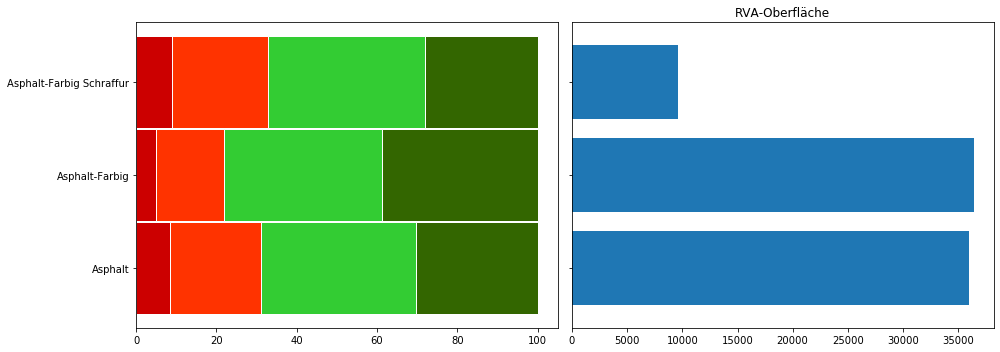

                            unsafe  almost_unsafe  almost_safe       safe
Asphalt                   8.542686      22.612828    38.589373  30.255113
Asphalt-Farbig            4.890647      17.087043    39.353226  38.669085
Asphalt-Farbig Schraffur  8.903186      23.970115    39.140811  27.985888


In [32]:
df = bike_data["ms"]
df = df[(df["RVA-Breite"] != 0)]
group1 = df[(df["RVA-Oberfläche"] == "Asphalt")] [["rating", "sessionID"]]
group2 = df[(df["RVA-Oberfläche"] == "Asphalt-Farbig")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "RVA-Oberfläche", ["Asphalt", "Asphalt-farbig"])
group_comparison(group1,group2)
likert_plot (df[["RVA-Oberfläche","rating"]])

#### h1) Einflussfaktor "Grüneinfärbung"  (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - nur mit RVA) <br> ohne Parken + breite RVA
Gruppe1: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt-farbig"

<Figure size 432x288 with 0 Axes>

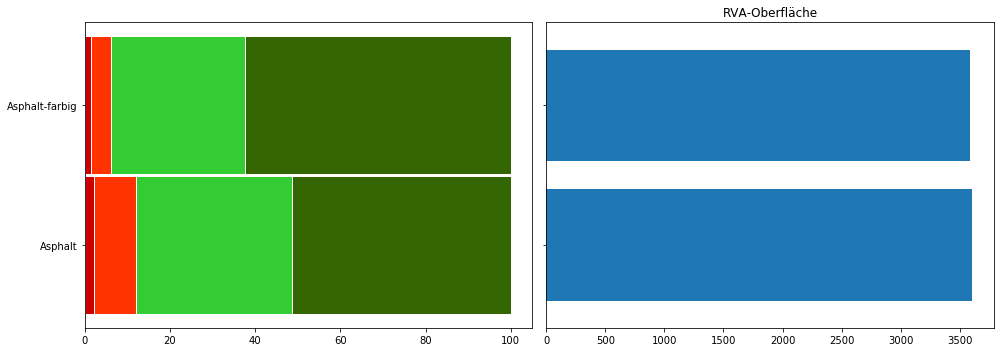

          unsafe  almost_unsafe  almost_safe       safe
group1  2.093152       9.869698    36.623233  51.413917
group2  1.519799       4.684886    31.372002  62.423313
Mittelwert von  Asphalt - 2.37357915164957
Mittelwert von  Asphalt-farbig - 2.5469882877858336
Bootstrap Ergebnis: 0.0    (0.0, 16.666666666666668)
Unterschied im Mittelwert von Asphalt zu Asphalt-farbig (in Prozent) -6.808399432688904
Ist der Unterschied signifikant? False
sicher Gruppe 1  87.55198225672304 sicher Gruppe2 93.50250976017847


In [33]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] == 3.5) & (df["Parken"] == "-")]

group1 = df[(df["RVA-Oberfläche"] == "Asphalt")] [["rating", "sessionID"]]
group2 = df[(df["RVA-Oberfläche"] == "Asphalt-Farbig")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "RVA-Oberfläche", ["Asphalt", "Asphalt-farbig"])
group_comparison(group1,group2)

#### h2) Einflussfaktor "Grüneinfärbung"  (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - nur mit RVA) <br> ohne Parken + schmale RVA
Gruppe1: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt-farbig"

<Figure size 432x288 with 0 Axes>

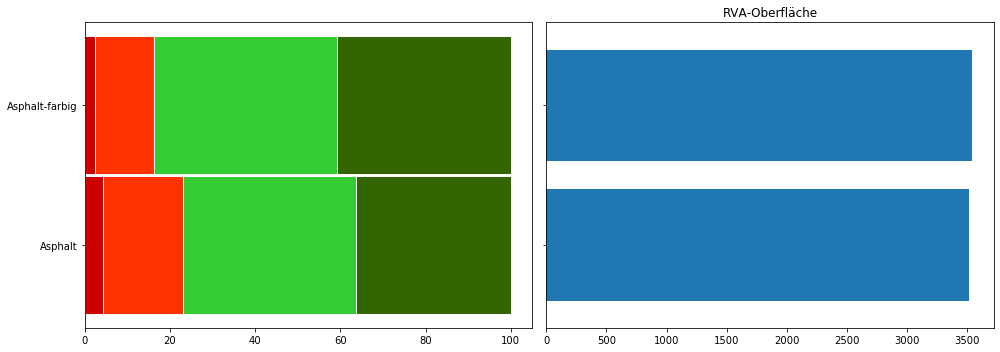

          unsafe  almost_unsafe  almost_safe       safe
group1  4.214123      18.878132    40.674829  36.232916
group2  2.356760      13.914762    43.028507  40.699972
Mittelwert von  Asphalt - 2.089265375854214
Mittelwert von  Asphalt-farbig - 2.2207169065763477
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Asphalt zu Asphalt-farbig (in Prozent) -5.9193285885678595
Ist der Unterschied signifikant? True
sicher Gruppe 1  76.19589977220956 sicher Gruppe2 83.06519898391194


In [34]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] == 2) & (df["Parken"] == "-")]

group1 = df[(df["RVA-Oberfläche"] == "Asphalt")] [["rating", "sessionID"]]
group2 = df[(df["RVA-Oberfläche"] == "Asphalt-Farbig")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "RVA-Oberfläche", ["Asphalt", "Asphalt-farbig"])
group_comparison(group1,group2)

#### h3) Einflussfaktor "Grüneinfärbung"  (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - nur mit RVA) <br> mit Parken + breite RVA
Gruppe1: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt-farbig"

<Figure size 432x288 with 0 Axes>

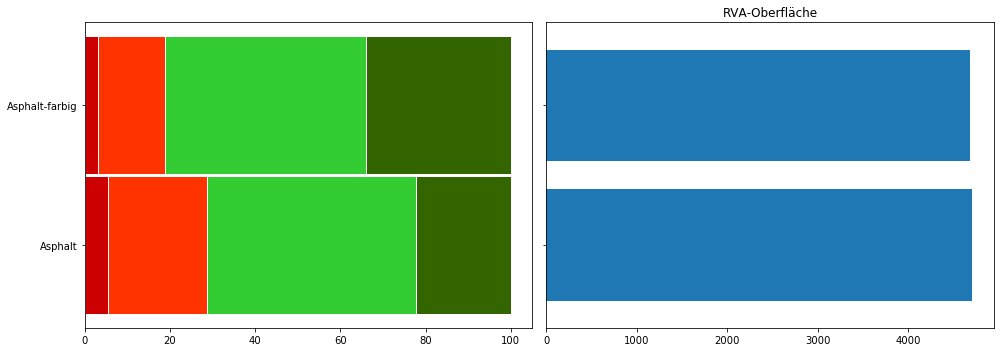

          unsafe  almost_unsafe  almost_safe       safe
group1  5.439864      23.331917    49.033149  22.195070
group2  3.014109      15.786661    47.135528  34.063702
Mittelwert von  Asphalt - 1.8798342541436464
Mittelwert von  Asphalt-farbig - 2.12248824283882
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Asphalt zu Asphalt-farbig (in Prozent) -11.432524515218267
Ist der Unterschied signifikant? True
sicher Gruppe 1  70.1657458563536 sicher Gruppe2 80.4189824711415


In [35]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] == 3.5) & (df["Parken"] != "-")]

group1 = df[(df["RVA-Oberfläche"] == "Asphalt")] [["rating", "sessionID"]]
group2 = df[(df["RVA-Oberfläche"] == "Asphalt-Farbig")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "RVA-Oberfläche", ["Asphalt", "Asphalt-farbig"])
group_comparison(group1,group2)

#### h4) Einflussfaktor "Grüneinfärbung"  (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - nur mit RVA) <br> mit Parken + schmale RVA
Gruppe1: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt-farbig"

<Figure size 432x288 with 0 Axes>

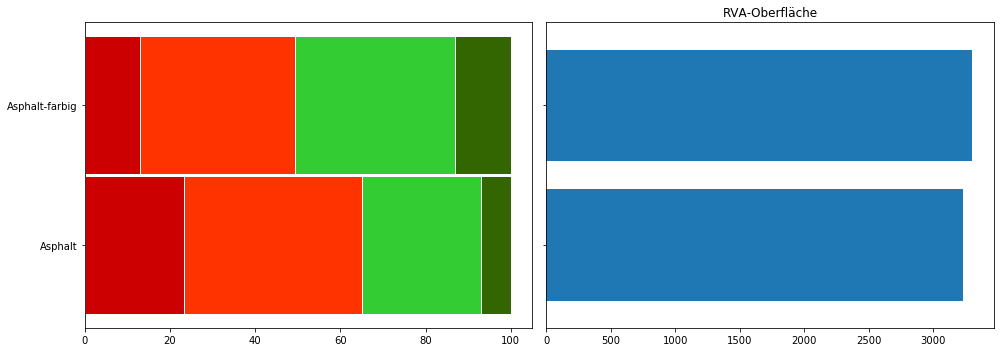

           unsafe  almost_unsafe  almost_safe       safe
group1  23.288944      41.684732    28.135646   6.890678
group2  12.916414      36.462750    37.431859  13.188976
Mittelwert von  Asphalt - 1.1862805822235987
Mittelwert von  Asphalt-farbig - 1.5089339794064203
Bootstrap Ergebnis: -33.333333333333336    (-66.66666666666667, -16.66666666666667)
Unterschied im Mittelwert von Asphalt zu Asphalt-farbig (in Prozent) -21.382870396340735
Ist der Unterschied signifikant? True
sicher Gruppe 1  34.19015174976773 sicher Gruppe2 49.8182919442762


In [36]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] == 2) & (df["Parken"] != "-")]

group1 = df[(df["RVA-Oberfläche"] == "Asphalt")] [["rating", "sessionID"]]
group2 = df[(df["RVA-Oberfläche"] == "Asphalt-Farbig")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "RVA-Oberfläche", ["Asphalt", "Asphalt-farbig"])
group_comparison(group1,group2)

### i) Annahme, dass es wichtiger ist entweder eine Grüneinfärbung oder eine bauliche Trennung zu haben, aber nicht beides notwendig ist. <br> ohne Parken, kein RVA zwischen Parken-Seitenraum
Gruppe1: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt" + baul Trennung <br>
Gruppe2: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt-farbig", keine baul Trennung <br>
Gruppe3: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt-farbig" + baul Trennung

<Figure size 432x288 with 0 Axes>

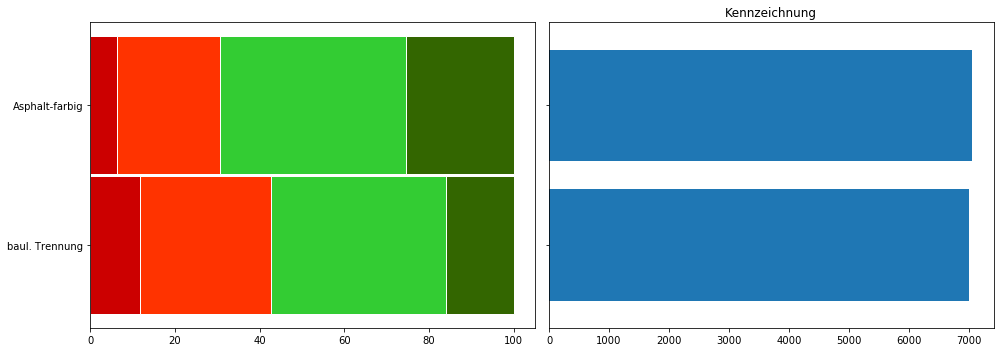

           unsafe  almost_unsafe  almost_safe       safe
group1  11.787805      30.901042    41.432243  15.878909
group2   6.219011      24.408556    43.873070  25.499363
Mittelwert von  baul. Trennung - 1.614022561759246
Mittelwert von  Asphalt-farbig - 1.8865278368040799
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von baul. Trennung zu Asphalt-farbig (in Prozent) -14.444805410689208
Ist der Unterschied signifikant? True
sicher Gruppe 1  55.17635299157504 sicher Gruppe2 67.44581385465364


<Figure size 432x288 with 0 Axes>

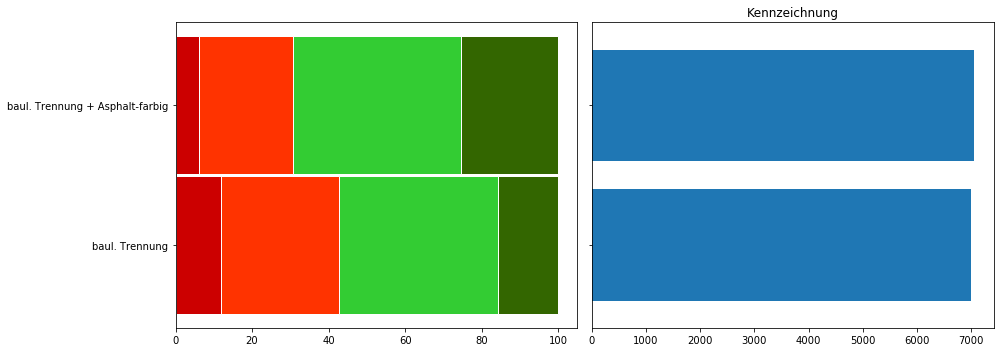

           unsafe  almost_unsafe  almost_safe       safe
group1  11.787805      30.901042    41.432243  15.878909
group2   6.219011      24.408556    43.873070  25.499363
Mittelwert von  baul. Trennung - 1.614022561759246
Mittelwert von  baul. Trennung + Asphalt-farbig - 1.8865278368040799
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von baul. Trennung zu baul. Trennung + Asphalt-farbig (in Prozent) -14.444805410689208
Ist der Unterschied signifikant? True
sicher Gruppe 1  55.17635299157504 sicher Gruppe2 67.44581385465364


<Figure size 432x288 with 0 Axes>

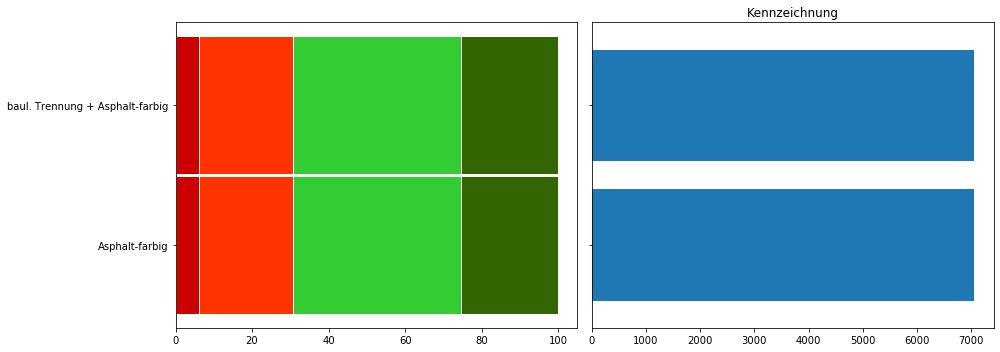

          unsafe  almost_unsafe  almost_safe       safe
group1  6.219011      24.408556     43.87307  25.499363
group2  6.219011      24.408556     43.87307  25.499363
Mittelwert von  Asphalt-farbig - 1.8865278368040799
Mittelwert von  baul. Trennung + Asphalt-farbig - 1.8865278368040799
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Asphalt-farbig zu baul. Trennung + Asphalt-farbig (in Prozent) 0.0
Ist der Unterschied signifikant? True
sicher Gruppe 1  67.44581385465364 sicher Gruppe2 67.44581385465364


In [37]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df ["Parken"] != "-")]
group1 = df[(df["RVA-Oberfläche"] == "Asphalt") & (["Tr_li-baulTrennung"] !="-")] [["rating", "sessionID"]]
group2 = df[(df["RVA-Oberfläche"] == "Asphalt-Farbig") & (["Tr_li-baulTrennung"] =="-")] [["rating", "sessionID"]]
group3 = group2 = df[(df["RVA-Oberfläche"] == "Asphalt-Farbig") & (["Tr_li-baulTrennung"] !="-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Kennzeichnung", ["baul. Trennung", "Asphalt-farbig"])
group_comparison(group1,group2)
test_hypothesis(group1, group3, "Kennzeichnung", ["baul. Trennung", "baul. Trennung + Asphalt-farbig"])
group_comparison(group1,group3)
test_hypothesis(group2, group3, "Kennzeichnung", ["Asphalt-farbig", "baul. Trennung + Asphalt-farbig"])
group_comparison(group2,group3)



### i) RVA zwischen Parken und Seitenraum <br> 
Gruppe1: Kfz-Hauptverkehrsstraßen RVA-Breite = "schmal"  <br>
Gruppe2: Kfz-Hauptverkehrsstraßen RVA-Breite = "breit" 

c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:88: RuntimeWarning: invalid value encountered in true_divide
  unsafe_bars = np.array([group1[group1 == 0].shape[0], group2[group2 == 0].shape[0]])/totals * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:89: RuntimeWarning: invalid value encountered in true_divide
  unsafe_bars = unsafe_bars + np.array([group1[group1 == 0.5].shape[0], group2[group2 == 0.5].shape[0]])/(2* totals) * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:90: RuntimeWarning: invalid value encountered in true_divide
  almost_unsafe_bars = np.array([group1[group1 == 1].shape[0], group2[group2 == 1].shape[0]])/totals * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:91: RuntimeWarning: invalid value encountered in true_divide
  almost_unsafe_bars = almost_unsafe_bars + np.array([group1[group1 == 0.5].shape[0], group2[group2 == 0.5].shape[0]])/(2* totals) * 100
c:\users\nb\jupyt

<Figure size 432x288 with 0 Axes>

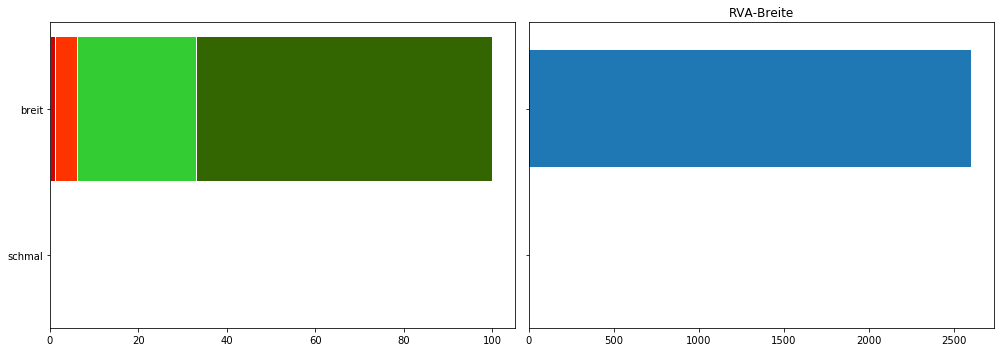

          unsafe  almost_unsafe  almost_safe       safe
group1       NaN            NaN          NaN        NaN
group2  1.055662       5.143954     26.81382  66.986564
Mittelwert von  schmal - nan
Mittelwert von  breit - 2.5973128598848367


C:\Users\NB\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
C:\Users\NB\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Bootstrap Ergebnis: nan    (nan, nan)
Unterschied im Mittelwert von schmal zu breit (in Prozent) nan
Ist der Unterschied signifikant? False
sicher Gruppe 1  0.0 sicher Gruppe2 93.39731285988483


C:\Users\NB\Anaconda3\lib\site-packages\bootstrapped\bootstrap.py:67: RuntimeWarning: invalid value encountered in sign
  return _np.sign(self.upper_bound) == _np.sign(self.lower_bound)


In [38]:
df = bike_data["ms"]
df = df[(df["RVA-Lage"] == "Parken-Seitenraum")]
group1 = df[(df["RVA-Breite"] == 2.0) ] [["rating", "sessionID"]]
group2 = df[(df["RVA-Breite"] == 3.5) ] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "RVA-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

#### i1) RVA zwischen Parken und Seitenraum - bauliche Trennung
Gruppe1: RVA zwischen Parken und Seitenraum - ohne baul. Trennung <br>
Gruppe2: RVA zwischen Parken und Seitenraum - mit baul- Trennung

<Figure size 432x288 with 0 Axes>

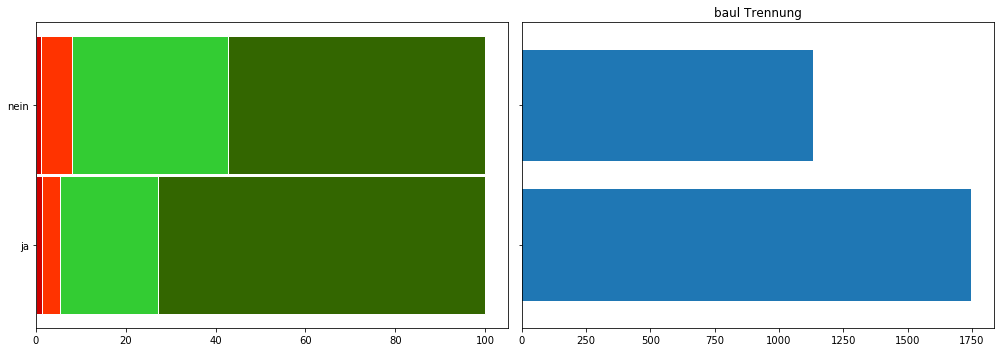

          unsafe  almost_unsafe  almost_safe       safe
group1  1.431025       3.978248    21.665713  72.925014
group2  1.060071       7.022968    34.584806  57.332155
Mittelwert von  ja - 2.660847166571265
Mittelwert von  nein - 2.4818904593639575
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) 7.2104998241207445
Ist der Unterschied signifikant? True
sicher Gruppe 1  94.21866056096165 sicher Gruppe2 91.69611307420494


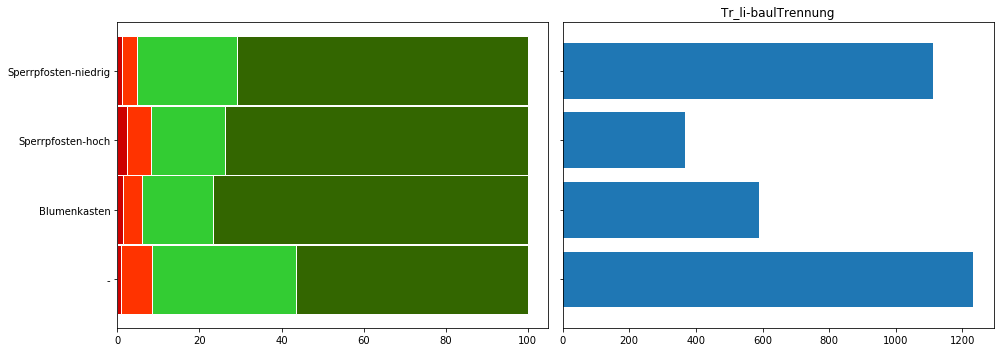

                        unsafe  almost_unsafe  almost_safe       safe
-                     0.974026       7.467532    35.146104  56.412338
Blumenkasten          1.358234       4.753820    17.317487  76.570458
Sperrpfosten-hoch     2.459016       5.737705    18.032787  73.770492
Sperrpfosten-niedrig  1.258993       3.597122    24.280576  70.863309


In [39]:
df = bike_data["ms"]
df = df[(df["RVA-Lage"] == "Parken-Seitenraum")]
group1 = df[(df["Tr_li-baulTrennung"] !="-") ] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-baulTrennung"] =="-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "baul Trennung", ["ja", "nein"])
group_comparison(group1,group2)
likert_plot (df[["Tr_li-baulTrennung","rating"]])

#### i2) RVA Lage: zwischen Parken und Seitenraum - RVA zwischen Fahrbahn und Seitenraum (nur breit, keine Tram, keine Einbahn)
Gruppe1: RVA zwischen Parken und Seitenraum<br>
Gruppe2: RVA zwischen Fahrbahn und Parken

<Figure size 432x288 with 0 Axes>

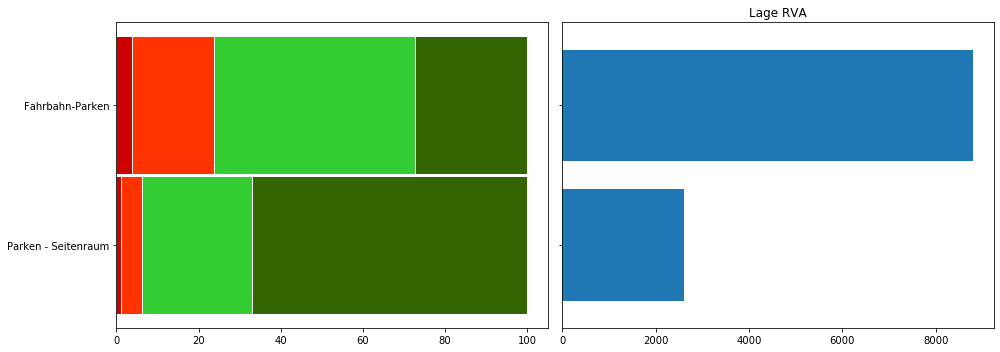

          unsafe  almost_unsafe  almost_safe       safe
group1  1.055662       5.143954    26.813820  66.986564
group2  3.812933      19.951131    48.818048  27.417888
Mittelwert von  Parken - Seitenraum - 2.5973128598848367
Mittelwert von  Fahrbahn-Parken - 1.9984089101034208
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von Parken - Seitenraum zu Fahrbahn-Parken (in Prozent) 29.969039206816873
Ist der Unterschied signifikant? True
sicher Gruppe 1  93.39731285988483 sicher Gruppe2 74.5425616547335


In [40]:
df = bike_data["ms"]
group1 = df[(df["RVA-Lage"] == "Parken-Seitenraum") ] [["rating", "sessionID"]]
group2 = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] == 3.5) & (df ["Parken"] != "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Lage RVA", ["Parken - Seitenraum", "Fahrbahn-Parken"])
group_comparison(group1,group2)